# Dubai Properties

#### Данные
- trans_group_en – тип транзакции (покупка/подарок/ипотека)
- procedure_name_en – тип процедуры покупки
- instance_date – дата покупки
- property_type_en – тип объекта недвижимости
- property_sub_type_en – подтип объекта недвижимости
- property_usage_en – назначение объекта недвижимости
- reg_type_en – тип готовности объекта
- area_name_en – название района/города в Дубае
- building_name_en – название здания
- project_name_en – название ЖК
- master_project_en – название проекта
- nearest_landmark_en – ближайшая достопримечательность
- nearest_metro_en – ближайшее метро
- nearest_mall_en – ближайший ТРЦ
- rooms_en – количество комнат
- has_parking – есть ли паркинг
- procedure_area – площадь
- actual_worth – стоимость
- meter_sale_price – стоимость за квадратный метр

#### TODO
- [x] Импорт данных
- [x] Очистка данных
- [x] Описательная статистика
- [x] Обогащение данными
- [x] Линейная регрессия
- [ ] Neural network
- [ ] Random Forest
- [X] CatBoost
- [ ] Spatio Temporal Lag
- [ ] UI

## 1. Подготовка данных

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

In [24]:
#Импортирование данных

DF = pd.read_csv('Transactions_new.csv')

In [25]:
# Выводим датасет и убеждаемся, что все импортировалось как нужно

DF.head(5)

transaction_id  procedure_id  trans_group_id trans_group_ar trans_group_en  \
0  1-11-2001-165            11               1        مبايعات          Sales   
1   3-9-2004-223             9               3           هبات          Gifts   
2  2-13-1996-119            13               2           رهون      Mortgages   
3  2-14-2005-222            14               2           رهون      Mortgages   
4   3-9-2012-874             9               3           هبات          Gifts   

  procedure_name_ar      procedure_name_en instance_date  property_type_id  \
0               بيع                   Sell    24-02-2001                 1   
1               هبه                  Grant    13-12-2004                 4   
2         تسجيل رهن  Mortgage Registration    12-03-2001                 1   
3         تعديل رهن        Modify Mortgage    20-09-2005                 2   
4               هبه                  Grant    11-10-2012                 4   

  property_type_ar  ... rooms_en  has_parking procedure_area actual_worth  \
0              أرض  ...      NaN            0        1393.55    1350000.0   
1             فيلا  ...      NaN            0        1728.00    2790000.0   
2              أرض  ...      NaN            0         929.03   20000000.0   
3             مبنى  ...      NaN            0        2673.28   25000000.0   
4             فيلا  ...      NaN            0        1541.17    9000000.0   

  meter_sale_price rent_value  meter_rent_price no_of_parties_role_1  \
0           968.75        NaN               NaN                  1.0   
1          1614.58        NaN               NaN                  1.0   
2         21527.83        NaN               NaN                  1.0   
3          9351.81        NaN               NaN                  1.0   
4          5839.72        NaN               NaN                  1.0   

  no_of_parties_role_2  no_of_parties_role_3  
0                  1.0                   0.0  
1                  1.0                   0.0  
2                  1.0                   0.0  
3                  1.0                   0.0  
4                  1.0                   0.0  

[5 rows x 46 columns]

In [26]:
# Оставляем только необходимые нам столбцы

DF = DF[[
    'trans_group_en', 
    'procedure_name_en', 
    'instance_date', 
    'property_sub_type_en', 
    'property_usage_en', 
    'reg_type_en',
    'area_name_en',
    'master_project_en',
    'nearest_landmark_en',
    'nearest_metro_en',
    'nearest_mall_en',
    'rooms_en',
    'has_parking',
    'procedure_area',
    'meter_sale_price',
]]

In [27]:
# Выводим свойства столбцов датасета

DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1059241 entries, 0 to 1059240
Data columns (total 15 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   trans_group_en        1059241 non-null  object 
 1   procedure_name_en     1059241 non-null  object 
 2   instance_date         1059236 non-null  object 
 3   property_sub_type_en  817279 non-null   object 
 4   property_usage_en     1059241 non-null  object 
 5   reg_type_en           1059241 non-null  object 
 6   area_name_en          1059241 non-null  object 
 7   master_project_en     873552 non-null   object 
 8   nearest_landmark_en   930932 non-null   object 
 9   nearest_metro_en      818462 non-null   object 
 10  nearest_mall_en       813109 non-null   object 
 11  rooms_en              808343 non-null   object 
 12  has_parking           1059241 non-null  int64  
 13  procedure_area        1059241 non-null  float64
 14  meter_sale_price      1059241 non-

In [28]:
# Посчитаем пропуски по столбцам
# Видно, что пропуски в основном в категориальных переменных. Их мы не сможем заменить, поэтому будем избавляться от всех NA.

DF.isna().sum()

trans_group_en               0
procedure_name_en            0
instance_date                5
property_sub_type_en    241962
property_usage_en            0
reg_type_en                  0
area_name_en                 0
master_project_en       185689
nearest_landmark_en     128309
nearest_metro_en        240779
nearest_mall_en         246132
rooms_en                250898
has_parking                  0
procedure_area               0
meter_sale_price             0
dtype: int64

In [29]:
# Очистка данных

DF.dropna(inplace=True)

In [30]:
DF.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 564755 entries, 764 to 1059234
Data columns (total 15 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   trans_group_en        564755 non-null  object 
 1   procedure_name_en     564755 non-null  object 
 2   instance_date         564755 non-null  object 
 3   property_sub_type_en  564755 non-null  object 
 4   property_usage_en     564755 non-null  object 
 5   reg_type_en           564755 non-null  object 
 6   area_name_en          564755 non-null  object 
 7   master_project_en     564755 non-null  object 
 8   nearest_landmark_en   564755 non-null  object 
 9   nearest_metro_en      564755 non-null  object 
 10  nearest_mall_en       564755 non-null  object 
 11  rooms_en              564755 non-null  object 
 12  has_parking           564755 non-null  int64  
 13  procedure_area        564755 non-null  float64
 14  meter_sale_price      564755 non-null  float64
dt

In [31]:
# Оставляем только интересующие нас типы недвижимости

DF = DF[DF['property_sub_type_en'].isin(['Villa', 'Flat'])]

In [32]:
# Категоризация переменных

DF['trans_group_en'] = DF['trans_group_en'].astype('category')
DF['procedure_name_en'] = DF['procedure_name_en'].astype('category')
DF['property_sub_type_en'] = DF['property_sub_type_en'].astype('category')
DF['property_usage_en'] = DF['property_usage_en'].astype('category')
DF['reg_type_en'] = DF['reg_type_en'].astype('category')
DF['area_name_en'] = DF['area_name_en'].astype('category')
DF['master_project_en'] = DF['master_project_en'].astype('category')
DF['nearest_landmark_en'] = DF['nearest_landmark_en'].astype('category')
DF['nearest_metro_en'] = DF['nearest_metro_en'].astype('category')
DF['nearest_mall_en'] = DF['nearest_mall_en'].astype('category')
DF['rooms_en'] = DF['rooms_en'].astype('category')
DF['has_parking'] = DF['has_parking'].astype('category')
DF['instance_date'] = pd.to_datetime(DF['instance_date'], dayfirst = True)
DF['instance_date'] = pd.to_datetime(DF['instance_date'], format="%d-%m-%y")

In [33]:
DF.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 479529 entries, 764 to 1059234
Data columns (total 15 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   trans_group_en        479529 non-null  category      
 1   procedure_name_en     479529 non-null  category      
 2   instance_date         479529 non-null  datetime64[ns]
 3   property_sub_type_en  479529 non-null  category      
 4   property_usage_en     479529 non-null  category      
 5   reg_type_en           479529 non-null  category      
 6   area_name_en          479529 non-null  category      
 7   master_project_en     479529 non-null  category      
 8   nearest_landmark_en   479529 non-null  category      
 9   nearest_metro_en      479529 non-null  category      
 10  nearest_mall_en       479529 non-null  category      
 11  rooms_en              479529 non-null  category      
 12  has_parking           479529 non-null  category      
 

## 2. Обогащение данными

### 2.1 Геокодинг
В рамках геокодинга добавим:
- координаты объекта
- расстояние до метро
- расстояние до ТРЦ
- расстояние до ближайшей достопримечательности

In [34]:
# Импортируем библиотеки геокодинга

from geopy.geocoders import Nominatim
from geopy import distance

In [35]:
# Уникальные названия ЖК, по ним будем искать их координаты

print(DF['master_project_en'].unique())

['Springs - 7', 'Springs - 5', 'Springs - 1', 'Springs - 2', 'Springs - 3', ..., 'Lakes - Hattan II', 'Meadows 7', 'Meadows 2', 'Emirates Hills', 'DUBAI HILLS - SIDRA 1']
Length: 71
Categories (71, object): ['Al Furjan', 'Arabian Ranches - Saheel', 'Arjan', 'Burj Khalifa', ..., 'The Lagoons', 'Uptown Mirdif', 'Wasl 1', 'Wasl Gate']


In [36]:
# Инициализируем геолокатор

geolocator = Nominatim(timeout=10, user_agent = "myGeolocator")

In [37]:
# Сформируем отдельный датасеты для геокодинга, тк основной датасет очень большой

DF_master_project = pd.DataFrame({
    "master_project_en": DF['master_project_en'].unique()
})

DF_metro = pd.DataFrame({
    "nearest_metro_en": DF['nearest_metro_en'].unique()
})

DF_landmark = pd.DataFrame({
    "nearest_landmark_en": DF['nearest_landmark_en'].unique()
})

DF_mall = pd.DataFrame({
    "nearest_mall_en": DF['nearest_mall_en'].unique()
})

In [38]:
# Добавим новый столбец с полным адресом и сделаем геокодинг

DF_master_project['full_address'] = DF_master_project.master_project_en.astype("str") + ', Dubai, United Arab Emirates'
DF_master_project['gcode'] = DF_master_project.full_address.apply(geolocator.geocode)

DF_metro['full_address'] = DF_metro.nearest_metro_en.astype("str") + ', Dubai, United Arab Emirates'
DF_metro['gcode'] = DF_metro.full_address.apply(geolocator.geocode)

DF_landmark['full_address'] = DF_landmark.nearest_landmark_en.astype("str") + ', Dubai, United Arab Emirates'
DF_landmark['gcode'] = DF_landmark.full_address.apply(geolocator.geocode)

DF_mall['full_address'] = DF_mall.nearest_mall_en.astype("str") + ', Dubai, United Arab Emirates'
DF_mall['gcode'] = DF_mall.full_address.apply(geolocator.geocode)

In [39]:
# Добавим координаты широты и долготы

DF_master_project['lat'] = [None if g is None else g.latitude for g in DF_master_project.gcode]
DF_master_project['long'] = [None if g is None else g.longitude or None for g in DF_master_project.gcode]

DF_metro['lat'] = [None if g is None else g.latitude for g in DF_metro.gcode]
DF_metro['long'] = [None if g is None else g.longitude or None for g in DF_metro.gcode]

DF_landmark['lat'] = [None if g is None else g.latitude for g in DF_landmark.gcode]
DF_landmark['long'] = [None if g is None else g.longitude or None for g in DF_landmark.gcode]

DF_mall['lat'] = [None if g is None else g.latitude for g in DF_mall.gcode]
DF_mall['long'] = [None if g is None else g.longitude or None for g in DF_mall.gcode]

DF_master_project

master_project_en                                       full_address  \
0             Springs - 7           Springs - 7, Dubai, United Arab Emirates   
1             Springs - 5           Springs - 5, Dubai, United Arab Emirates   
2             Springs - 1           Springs - 1, Dubai, United Arab Emirates   
3             Springs - 2           Springs - 2, Dubai, United Arab Emirates   
4             Springs - 3           Springs - 3, Dubai, United Arab Emirates   
..                    ...                                                ...   
66      Lakes - Hattan II     Lakes - Hattan II, Dubai, United Arab Emirates   
67              Meadows 7             Meadows 7, Dubai, United Arab Emirates   
68              Meadows 2             Meadows 2, Dubai, United Arab Emirates   
69         Emirates Hills        Emirates Hills, Dubai, United Arab Emirates   
70  DUBAI HILLS - SIDRA 1  DUBAI HILLS - SIDRA 1, Dubai, United Arab Emir...   

                                                gcode        lat       long  
0   (الينابيع ٧, دبي, الإمارات العربية المتحدة, (2...  25.063880  55.191513  
1   (الينابيع ٥, دبي, الإمارات العربية المتحدة, (2...  25.064057  55.187041  
2   (الينابيع 1, مركز دبي المالي العالمي, دبي, الإ...  25.061119  55.160821  
3   (الينابيع 2, دبي, الإمارات العربية المتحدة, (2...  25.057409  55.167019  
4   (الينابيع 3, دبي, الإمارات العربية المتحدة, (2...  25.057884  55.176046  
..                                                ...        ...        ...  
66                                               None        NaN        NaN  
67  (Meadows 7, مركز دبي المالي العالمي, دبي, الإم...  25.062077  55.178963  
68  (ميدوز 2, دبي, الإمارات العربية المتحدة, (25.0...  25.069485  55.151440  
69  (Emirates Hills, تلال الإمارات, دبي, الإمارات ...  25.067788  55.183385  
70  (Dubai Hills Sales Center, Sidra 1, Sidra Vill...  25.094541  55.245542  

[71 rows x 5 columns]

In [40]:
# Вручную добавим недостающие координаты для ЖК

DF_master_project.loc[DF_master_project['master_project_en'] == 'International Media Production Zone', 'lat'] = 25.033542993655033
DF_master_project.loc[DF_master_project['master_project_en'] == 'International Media Production Zone', 'long'] = 55.18917001485356
DF_master_project.loc[DF_master_project['master_project_en'] == 'TECOM Site C', 'lat'] = 25.097428719611617
DF_master_project.loc[DF_master_project['master_project_en'] == 'TECOM Site C', 'long'] = 55.17756110264013
DF_master_project.loc[DF_master_project['master_project_en'] == 'Down Town Jabal Ali', 'lat'] = 24.96105936394376
DF_master_project.loc[DF_master_project['master_project_en'] == 'Down Town Jabal Ali', 'long'] = 55.08270192949124
DF_master_project.loc[DF_master_project['master_project_en'] == 'TECOM Site B', 'lat'] = 25.094272787442044
DF_master_project.loc[DF_master_project['master_project_en'] == 'TECOM Site B', 'long'] = 55.175560083372986
DF_master_project.loc[DF_master_project['master_project_en'] == 'Dubai Investment Park First', 'lat'] = 25.000211714542417
DF_master_project.loc[DF_master_project['master_project_en'] == 'Dubai Investment Park First', 'long'] = 55.16834169258494
DF_master_project.loc[DF_master_project['master_project_en'] == 'The Lagoons', 'lat'] = 25.19770179006602
DF_master_project.loc[DF_master_project['master_project_en'] == 'The Lagoons', 'long'] = 55.355695124267285
DF_master_project.loc[DF_master_project['master_project_en'] == 'TECOM Site A', 'lat'] = 25.09214442690163
DF_master_project.loc[DF_master_project['master_project_en'] == 'TECOM Site A', 'long'] = 55.15783349732667
DF_master_project.loc[DF_master_project['master_project_en'] == 'Jumeriah Beach Residence - JBR', 'lat'] = 25.083137305514395 
DF_master_project.loc[DF_master_project['master_project_en'] == 'Jumeriah Beach Residence - JBR', 'long'] = 55.139013137811546
DF_master_project.at[24, 'lat'] = 25.083137305514395 
DF_master_project.at[24, 'long'] = 55.139013137811546
DF_master_project.loc[DF_master_project['master_project_en'] == 'Dubai Health Care City Phase 1', 'lat'] = 25.23606273566597
DF_master_project.loc[DF_master_project['master_project_en'] == 'Dubai Health Care City Phase 1', 'long'] = 55.32270853013264
DF_master_project.loc[DF_master_project['master_project_en'] == 'Dubai Health Care City Phase 2', 'lat'] = 25.232945714600916
DF_master_project.loc[DF_master_project['master_project_en'] == 'Dubai Health Care City Phase 2', 'long'] = 55.32351188330427
DF_master_project.loc[DF_master_project['master_project_en'] == 'HADAEQ SHEIKH MOHAMMED BIN RASHID - DISRICT 7', 'lat'] = 25.19949550070485 
DF_master_project.loc[DF_master_project['master_project_en'] == 'HADAEQ SHEIKH MOHAMMED BIN RASHID - DISRICT 7', 'long'] = 55.27392556849345
DF_master_project.loc[DF_master_project['master_project_en'] == 'DMCC-EZ2', 'lat'] = 25.07247559744288 
DF_master_project.loc[DF_master_project['master_project_en'] == 'DMCC-EZ2', 'long'] = 55.1392704930149
DF_master_project.loc[DF_master_project['master_project_en'] == 'Lakes - Hattan II', 'lat'] = 25.081750780370683 
DF_master_project.loc[DF_master_project['master_project_en'] == 'Lakes - Hattan II', 'long'] = 55.16575089175726
DF_master_project.loc[DF_master_project['master_project_en'] == 'DUBAI HILLS - MAPLE 1', 'lat'] = 25.09335555736875
DF_master_project.loc[DF_master_project['master_project_en'] == 'DUBAI HILLS - MAPLE 1', 'long'] = 55.25403781082174
DF_master_project.loc[DF_master_project['master_project_en'] == 'DUBAI HILLS - MAPLE 2', 'lat'] = 25.098416484757895
DF_master_project.loc[DF_master_project['master_project_en'] == 'DUBAI HILLS - MAPLE 2', 'long'] = 55.25332656664681
DF_master_project.loc[DF_master_project['master_project_en'] == 'DUBAI HILLS - MAPLE 3', 'lat'] = 25.10582583562555
DF_master_project.loc[DF_master_project['master_project_en'] == 'DUBAI HILLS - MAPLE 3', 'long'] = 55.255374215092395
DF_master_project.loc[DF_master_project['master_project_en'] == "Emaar's Street Of Dreams", 'lat'] = 25.195915926712992
DF_master_project.loc[DF_master_project['master_project_en'] == "Emaar's Street Of Dreams", 'long'] = 55.277645310842416 

DF_master_project

master_project_en                                       full_address  \
0             Springs - 7           Springs - 7, Dubai, United Arab Emirates   
1             Springs - 5           Springs - 5, Dubai, United Arab Emirates   
2             Springs - 1           Springs - 1, Dubai, United Arab Emirates   
3             Springs - 2           Springs - 2, Dubai, United Arab Emirates   
4             Springs - 3           Springs - 3, Dubai, United Arab Emirates   
..                    ...                                                ...   
66      Lakes - Hattan II     Lakes - Hattan II, Dubai, United Arab Emirates   
67              Meadows 7             Meadows 7, Dubai, United Arab Emirates   
68              Meadows 2             Meadows 2, Dubai, United Arab Emirates   
69         Emirates Hills        Emirates Hills, Dubai, United Arab Emirates   
70  DUBAI HILLS - SIDRA 1  DUBAI HILLS - SIDRA 1, Dubai, United Arab Emir...   

                                                gcode        lat       long  
0   (الينابيع ٧, دبي, الإمارات العربية المتحدة, (2...  25.063880  55.191513  
1   (الينابيع ٥, دبي, الإمارات العربية المتحدة, (2...  25.064057  55.187041  
2   (الينابيع 1, مركز دبي المالي العالمي, دبي, الإ...  25.061119  55.160821  
3   (الينابيع 2, دبي, الإمارات العربية المتحدة, (2...  25.057409  55.167019  
4   (الينابيع 3, دبي, الإمارات العربية المتحدة, (2...  25.057884  55.176046  
..                                                ...        ...        ...  
66                                               None  25.081751  55.165751  
67  (Meadows 7, مركز دبي المالي العالمي, دبي, الإم...  25.062077  55.178963  
68  (ميدوز 2, دبي, الإمارات العربية المتحدة, (25.0...  25.069485  55.151440  
69  (Emirates Hills, تلال الإمارات, دبي, الإمارات ...  25.067788  55.183385  
70  (Dubai Hills Sales Center, Sidra 1, Sidra Vill...  25.094541  55.245542  

[71 rows x 5 columns]

In [41]:
DF_metro

nearest_metro_en  \
0                       Damac Properties   
1                  Nakheel Metro Station   
2                    Dubai Internet City   
3                            Mina Seyahi   
4                   DANUBE Metro Station   
5              Ibn Battuta Metro Station   
6                Rashidiya Metro Station   
7     First Abu Dhabi Bank Metro Station   
8                Noor Bank Metro Station   
9                   ENERGY Metro Station   
10              Jumeirah Beach Residency   
11                         Marina Towers   
12               Jumeirah Beach Resdency   
13                 Jumeirah Lakes Towers   
14                          Dubai Marina   
15  Buj Khalifa Dubai Mall Metro Station   
16                         Palm Jumeirah   
17             Marina Mall Metro Station   
18                         Harbour Tower   
19            Business Bay Metro Station   
20               Sharaf Dg Metro Station   
21                     Knowledge Village   
22                Emirates Metro Station   
23                Al Jadaf Metro Station   
24                             Al Sufouh   
25            UAE Exchange Metro Station   
26                   Creek Metro Station   
27         Healthcare City Metro Station   
28             Al Jafiliya Metro Station   
29             Al Ghubaiba Metro Station   

                                         full_address  \
0       Damac Properties, Dubai, United Arab Emirates   
1   Nakheel Metro Station, Dubai, United Arab Emir...   
2    Dubai Internet City, Dubai, United Arab Emirates   
3            Mina Seyahi, Dubai, United Arab Emirates   
4   DANUBE Metro Station, Dubai, United Arab Emirates   
5   Ibn Battuta Metro Station, Dubai, United Arab ...   
6   Rashidiya Metro Station, Dubai, United Arab Em...   
7   First Abu Dhabi Bank Metro Station, Dubai, Uni...   
8   Noor Bank Metro Station, Dubai, United Arab Em...   
9   ENERGY Metro Station, Dubai, United Arab Emirates   
10  Jumeirah Beach Residency, Dubai, United Arab E...   
11         Marina Towers, Dubai, United Arab Emirates   
12  Jumeirah Beach Resdency, Dubai, United Arab Em...   
13  Jumeirah Lakes Towers, Dubai, United Arab Emir...   
14          Dubai Marina, Dubai, United Arab Emirates   
15  Buj Khalifa Dubai Mall Metro Station, Dubai, U...   
16         Palm Jumeirah, Dubai, United Arab Emirates   
17  Marina Mall Metro Station, Dubai, United Arab ...   
18         Harbour Tower, Dubai, United Arab Emirates   
19  Business Bay Metro Station, Dubai, United Arab...   
20  Sharaf Dg Metro Station, Dubai, United Arab Em...   
21     Knowledge Village, Dubai, United Arab Emirates   
22  Emirates Metro Station, Dubai, United Arab Emi...   
23  Al Jadaf Metro Station, Dubai, United Arab Emi...   
24             Al Sufouh, Dubai, United Arab Emirates   
25  UAE Exchange Metro Station, Dubai, United Arab...   
26   Creek Metro Station, Dubai, United Arab Emirates   
27  Healthcare City Metro Station, Dubai, United A...   
28  Al Jafiliya Metro Station, Dubai, United Arab ...   
29  Al Ghubaiba Metro Station, Dubai, United Arab ...   

                                                gcode        lat       long  
0   (دبي مارينا, شارع الشيخ زايد, تلال الإمارات, د...  25.079953  55.147594  
1                                                None        NaN        NaN  
2   (Dubai Internet City, قرية المعرفة, دبي, الإما...  25.095598  55.161734  
3   (الميناء السياحي Mina Seyahi, شارع الملك سلمان...  25.091045  55.148646  
4   (Danube Metro Station, شارع الشيخ زايد, جبل عل...  25.001297  55.095679  
5   (Bus E55 to Ibn Battuta Metro Station (every h...  24.885431  55.158962  
6   (Rashidiya Metro Station Car Park (Red Line), ...  25.229569  55.391476  
7                                                None        NaN        NaN  
8                                                None        NaN        NaN  
9   (Energy Metro Station, شارع الشيخ زايد, جبل عل...  25.026321  55.101285  
10                               

In [42]:
# Вручную добавим недостающие координаты для метро

DF_metro.loc[DF_metro['nearest_metro_en'] == 'Jumeirah Beach Residency', 'lat'] = 25.079982099455968
DF_metro.loc[DF_metro['nearest_metro_en'] == 'Jumeirah Beach Residency', 'long'] = 55.138149278107555

DF_metro.loc[DF_metro['nearest_metro_en'] == 'Marina Mall Metro Station', 'lat'] = 25.076428135523372
DF_metro.loc[DF_metro['nearest_metro_en'] == 'Marina Mall Metro Station', 'long'] = 55.14197616849133

DF_metro.loc[DF_metro['nearest_metro_en'] == 'Buj Khalifa Dubai Mall Metro Station', 'lat'] = 25.201611651560157
DF_metro.loc[DF_metro['nearest_metro_en'] == 'Buj Khalifa Dubai Mall Metro Station', 'long'] = 55.26950781266849

DF_metro.loc[DF_metro['nearest_metro_en'] == 'Nakheel Metro Station', 'lat'] = 25.08899029789469 
DF_metro.loc[DF_metro['nearest_metro_en'] == 'Nakheel Metro Station', 'long'] = 55.15809260783653

DF_metro.loc[DF_metro['nearest_metro_en'] == 'Jumeirah Beach Resdency', 'lat'] = 25.074385143932265
DF_metro.loc[DF_metro['nearest_metro_en'] == 'Jumeirah Beach Resdency', 'long'] = 55.132397009931175

DF_metro.loc[DF_metro['nearest_metro_en'] == 'Business Bay Metro Station', 'lat'] = 25.19145596093731
DF_metro.loc[DF_metro['nearest_metro_en'] == 'Business Bay Metro Station', 'long'] = 55.26030076849341

DF_metro.loc[DF_metro['nearest_metro_en'] == 'First Abu Dhabi Bank Metro Station', 'lat'] = 25.120000197937358
DF_metro.loc[DF_metro['nearest_metro_en'] == 'First Abu Dhabi Bank Metro Station', 'long'] = 55.19958610120157

DF_metro.loc[DF_metro['nearest_metro_en'] == 'Al Jadaf Metro Station', 'lat'] = 25.225180015939067
DF_metro.loc[DF_metro['nearest_metro_en'] == 'Al Jadaf Metro Station', 'long'] = 55.33365092616389

DF_metro.loc[DF_metro['nearest_metro_en'] == 'Creek Metro Station', 'lat'] = 25.219379082537397
DF_metro.loc[DF_metro['nearest_metro_en'] == 'Creek Metro Station', 'long'] = 55.33883459548382

DF_metro.loc[DF_metro['nearest_metro_en'] == 'Healthcare City Metro Station', 'lat'] = 25.23107478400269
DF_metro.loc[DF_metro['nearest_metro_en'] == 'Healthcare City Metro Station', 'long'] = 55.32279349732888

DF_metro.loc[DF_metro['nearest_metro_en'] == 'Al Jafiliya Metro Station', 'lat'] = 25.2337450495845
DF_metro.loc[DF_metro['nearest_metro_en'] == 'Al Jafiliya Metro Station', 'long'] = 55.29209721082395

DF_metro.loc[DF_metro['nearest_metro_en'] == 'Noor Bank Metro Station', 'lat'] = 25.155942586558552
DF_metro.loc[DF_metro['nearest_metro_en'] == 'Noor Bank Metro Station', 'long'] = 55.22849041082285

DF_metro.loc[DF_metro['nearest_metro_en'] == 'Al Ghubaiba Metro Station', 'lat'] = 25.265013251747984
DF_metro.loc[DF_metro['nearest_metro_en'] == 'Al Ghubaiba Metro Station', 'long'] = 55.287912496065125

DF_metro

nearest_metro_en  \
0                       Damac Properties   
1                  Nakheel Metro Station   
2                    Dubai Internet City   
3                            Mina Seyahi   
4                   DANUBE Metro Station   
5              Ibn Battuta Metro Station   
6                Rashidiya Metro Station   
7     First Abu Dhabi Bank Metro Station   
8                Noor Bank Metro Station   
9                   ENERGY Metro Station   
10              Jumeirah Beach Residency   
11                         Marina Towers   
12               Jumeirah Beach Resdency   
13                 Jumeirah Lakes Towers   
14                          Dubai Marina   
15  Buj Khalifa Dubai Mall Metro Station   
16                         Palm Jumeirah   
17             Marina Mall Metro Station   
18                         Harbour Tower   
19            Business Bay Metro Station   
20               Sharaf Dg Metro Station   
21                     Knowledge Village   
22                Emirates Metro Station   
23                Al Jadaf Metro Station   
24                             Al Sufouh   
25            UAE Exchange Metro Station   
26                   Creek Metro Station   
27         Healthcare City Metro Station   
28             Al Jafiliya Metro Station   
29             Al Ghubaiba Metro Station   

                                         full_address  \
0       Damac Properties, Dubai, United Arab Emirates   
1   Nakheel Metro Station, Dubai, United Arab Emir...   
2    Dubai Internet City, Dubai, United Arab Emirates   
3            Mina Seyahi, Dubai, United Arab Emirates   
4   DANUBE Metro Station, Dubai, United Arab Emirates   
5   Ibn Battuta Metro Station, Dubai, United Arab ...   
6   Rashidiya Metro Station, Dubai, United Arab Em...   
7   First Abu Dhabi Bank Metro Station, Dubai, Uni...   
8   Noor Bank Metro Station, Dubai, United Arab Em...   
9   ENERGY Metro Station, Dubai, United Arab Emirates   
10  Jumeirah Beach Residency, Dubai, United Arab E...   
11         Marina Towers, Dubai, United Arab Emirates   
12  Jumeirah Beach Resdency, Dubai, United Arab Em...   
13  Jumeirah Lakes Towers, Dubai, United Arab Emir...   
14          Dubai Marina, Dubai, United Arab Emirates   
15  Buj Khalifa Dubai Mall Metro Station, Dubai, U...   
16         Palm Jumeirah, Dubai, United Arab Emirates   
17  Marina Mall Metro Station, Dubai, United Arab ...   
18         Harbour Tower, Dubai, United Arab Emirates   
19  Business Bay Metro Station, Dubai, United Arab...   
20  Sharaf Dg Metro Station, Dubai, United Arab Em...   
21     Knowledge Village, Dubai, United Arab Emirates   
22  Emirates Metro Station, Dubai, United Arab Emi...   
23  Al Jadaf Metro Station, Dubai, United Arab Emi...   
24             Al Sufouh, Dubai, United Arab Emirates   
25  UAE Exchange Metro Station, Dubai, United Arab...   
26   Creek Metro Station, Dubai, United Arab Emirates   
27  Healthcare City Metro Station, Dubai, United A...   
28  Al Jafiliya Metro Station, Dubai, United Arab ...   
29  Al Ghubaiba Metro Station, Dubai, United Arab ...   

                                                gcode        lat       long  
0   (دبي مارينا, شارع الشيخ زايد, تلال الإمارات, د...  25.079953  55.147594  
1                                                None  25.088990  55.158093  
2   (Dubai Internet City, قرية المعرفة, دبي, الإما...  25.095598  55.161734  
3   (الميناء السياحي Mina Seyahi, شارع الملك سلمان...  25.091045  55.148646  
4   (Danube Metro Station, شارع الشيخ زايد, جبل عل...  25.001297  55.095679  
5   (Bus E55 to Ibn Battuta Metro Station (every h...  24.885431  55.158962  
6   (Rashidiya Metro Station Car Park (Red Line), ...  25.229569  55.391476  
7                                                None  25.120000  55.199586  
8                                                None  25.155943  55.228490  
9   (Energy Metro Station, شارع الشيخ زايد, جبل عل...  25.026321  55.101285  
10                               

In [43]:
DF_landmark

nearest_landmark_en  \
0  Sports City Swimming Academy   
1                  Burj Al Arab   
2                    Motor City   
3                Expo 2020 Site   
4   Dubai International Airport   
5                Global Village   
6          IMG World Adventures   
7                Downtown Dubai   
8                  Burj Khalifa   

                                        full_address  \
0  Sports City Swimming Academy, Dubai, United Ar...   
1          Burj Al Arab, Dubai, United Arab Emirates   
2            Motor City, Dubai, United Arab Emirates   
3        Expo 2020 Site, Dubai, United Arab Emirates   
4  Dubai International Airport, Dubai, United Ara...   
5        Global Village, Dubai, United Arab Emirates   
6  IMG World Adventures, Dubai, United Arab Emirates   
7        Downtown Dubai, Dubai, United Arab Emirates   
8          Burj Khalifa, Dubai, United Arab Emirates   

                                               gcode        lat       long  
0                                               None        NaN        NaN  
1  (برج العرب, شارع جميرا, أم سقيم 3, أم سقيم, دب...  25.141263  55.185404  
2  (Motor City, موتور سيتي, دبي, الإمارات العربية...  25.047102  55.238270  
3                                               None        NaN        NaN  
4  (مطار دبي الدولي, 3b شارع, Al Qusais 2, Dubai,...  25.252129  55.365716  
5  (Global village, Indian Chaat Bazaar, وادي الص...  25.069410  55.311058  
6                                               None        NaN        NaN  
7  (وسط مدينة دبي, الخليج التجاري, دبي, الإمارات ...  25.186886  55.274800  
8  (برج خليفة, 1, شارع الشيخ محمد بن راشد, وسط مد...  25.197031  55.274222

In [44]:
# Вручную добавим недостающие координаты для достопримечательностей

DF_landmark.loc[DF_landmark['nearest_landmark_en'] == 'Sports City Swimming Academy', 'lat'] = 25.042132693409545
DF_landmark.loc[DF_landmark['nearest_landmark_en'] == 'Sports City Swimming Academy', 'long'] = 55.21952377218269

DF_landmark.loc[DF_landmark['nearest_landmark_en'] == 'Expo 2020 Site', 'lat'] = 24.967218956410264 
DF_landmark.loc[DF_landmark['nearest_landmark_en'] == 'Expo 2020 Site', 'long'] = 55.15768472638599

DF_landmark.loc[DF_landmark['nearest_landmark_en'] == 'IMG World Adventures', 'lat'] = 25.082279418420768 
DF_landmark.loc[DF_landmark['nearest_landmark_en'] == 'IMG World Adventures', 'long'] = 55.3180615792579

DF_landmark

nearest_landmark_en  \
0  Sports City Swimming Academy   
1                  Burj Al Arab   
2                    Motor City   
3                Expo 2020 Site   
4   Dubai International Airport   
5                Global Village   
6          IMG World Adventures   
7                Downtown Dubai   
8                  Burj Khalifa   

                                        full_address  \
0  Sports City Swimming Academy, Dubai, United Ar...   
1          Burj Al Arab, Dubai, United Arab Emirates   
2            Motor City, Dubai, United Arab Emirates   
3        Expo 2020 Site, Dubai, United Arab Emirates   
4  Dubai International Airport, Dubai, United Ara...   
5        Global Village, Dubai, United Arab Emirates   
6  IMG World Adventures, Dubai, United Arab Emirates   
7        Downtown Dubai, Dubai, United Arab Emirates   
8          Burj Khalifa, Dubai, United Arab Emirates   

                                               gcode        lat       long  
0                                               None  25.042133  55.219524  
1  (برج العرب, شارع جميرا, أم سقيم 3, أم سقيم, دب...  25.141263  55.185404  
2  (Motor City, موتور سيتي, دبي, الإمارات العربية...  25.047102  55.238270  
3                                               None  24.967219  55.157685  
4  (مطار دبي الدولي, 3b شارع, Al Qusais 2, Dubai,...  25.252129  55.365716  
5  (Global village, Indian Chaat Bazaar, وادي الص...  25.069410  55.311058  
6                                               None  25.082279  55.318062  
7  (وسط مدينة دبي, الخليج التجاري, دبي, الإمارات ...  25.186886  55.274800  
8  (برج خليفة, 1, شارع الشيخ محمد بن راشد, وسط مد...  25.197031  55.274222

In [45]:
DF_mall

nearest_mall_en                                       full_address  \
0           Marina Mall           Marina Mall, Dubai, United Arab Emirates   
1  Mall of the Emirates  Mall of the Emirates, Dubai, United Arab Emirates   
2    Ibn-e-Battuta Mall    Ibn-e-Battuta Mall, Dubai, United Arab Emirates   
3    City Centre Mirdif    City Centre Mirdif, Dubai, United Arab Emirates   
4            Dubai Mall            Dubai Mall, Dubai, United Arab Emirates   

                                               gcode        lat       long  
0  (Marina Mall, دبي مارينا, مرسى دبي, دبي, الإما...  25.075874  55.141919  
1  (مول الإمارات, 1, شارع السيداف ١, البرشاء 1, ا...  25.118244  55.200362  
2                                               None        NaN        NaN  
3  (P F Chang, شارع الشيخ محمد بن زايد, مردف, دبي...  25.217343  55.407129  
4  (دبي مول, شارع المركز المالي, وسط مدينة دبي, د...  25.197096  55.279025

In [46]:
# Вручную добавим недостающие координаты для ТРЦ

DF_mall.loc[DF_mall['nearest_mall_en'] == 'Ibn-e-Battuta Mall', 'lat'] = 25.0447415858032
DF_mall.loc[DF_mall['nearest_mall_en'] == 'Ibn-e-Battuta Mall', 'long'] = 55.12027573965596

DF_mall

nearest_mall_en                                       full_address  \
0           Marina Mall           Marina Mall, Dubai, United Arab Emirates   
1  Mall of the Emirates  Mall of the Emirates, Dubai, United Arab Emirates   
2    Ibn-e-Battuta Mall    Ibn-e-Battuta Mall, Dubai, United Arab Emirates   
3    City Centre Mirdif    City Centre Mirdif, Dubai, United Arab Emirates   
4            Dubai Mall            Dubai Mall, Dubai, United Arab Emirates   

                                               gcode        lat       long  
0  (Marina Mall, دبي مارينا, مرسى دبي, دبي, الإما...  25.075874  55.141919  
1  (مول الإمارات, 1, شارع السيداف ١, البرشاء 1, ا...  25.118244  55.200362  
2                                               None  25.044742  55.120276  
3  (P F Chang, شارع الشيخ محمد بن زايد, مردف, دبي...  25.217343  55.407129  
4  (دبي مول, شارع المركز المالي, وسط مدينة دبي, د...  25.197096  55.279025

Теперь у нас есть дополнительные 4 датасета, которые содержат в себе координаты объектов.
На основе этих координат мы можем обогатить основной датасет расстояниями от ЖК до:
- До ближайшего метро
- До ближайшего ТРЦ
- До ближайшей достопримечательности

### 2.2 Обогащение данными
В основной датасет добавим расстояния:
- До ближайшего метро
- До ближайшего ТРЦ
- До ближайшей достопримечательности

In [47]:
# Добавим в основной датасет столбец с расстоянием до метро/достопримечательности/трц

distance_to_metro_col = []
distance_to_landmark_col = []
distance_to_mall_col = []


for index, row in DF.iterrows():
    # master_project
    master_project_match = DF_master_project.loc[row['master_project_en'] == DF_master_project['master_project_en']]
    master_project_lat = master_project_match.lat.values[0]
    master_project_long = master_project_match.long.values[0]
    master_project_coordinates = (master_project_lat, master_project_long)
    
    # metro
    metro_match = DF_metro.loc[row['nearest_metro_en'] == DF_metro['nearest_metro_en']]
    metro_lat = metro_match.lat.values[0]
    metro_long = metro_match.long.values[0]
    metro_coordinates = (metro_lat, metro_long)
    distance_to_metro = distance.distance(master_project_coordinates, metro_coordinates).m
    distance_to_metro_col.append(distance_to_metro)
    
    # landmark
    landmark_match = DF_landmark.loc[row['nearest_landmark_en'] == DF_landmark['nearest_landmark_en']]
    landmark_lat = landmark_match.lat.values[0]
    landmark_long = landmark_match.long.values[0]
    landmark_coordinates = (landmark_lat, landmark_long)
    distance_to_landmark = distance.distance(master_project_coordinates, landmark_coordinates).m
    distance_to_landmark_col.append(distance_to_landmark)
    
    # mall
    mall_match = DF_mall.loc[row['nearest_mall_en'] == DF_mall['nearest_mall_en']]
    mall_lat = mall_match.lat.values[0]
    mall_long = mall_match.long.values[0]
    mall_coordinates = (mall_lat, mall_long)
    distance_to_mall = distance.distance(master_project_coordinates, mall_coordinates).m
    distance_to_mall_col.append(distance_to_mall)
    
DF['distance_to_metro'] = distance_to_metro_col
DF['distance_to_landmark'] = distance_to_landmark_col
DF['distance_to_mall'] = distance_to_mall_col


DF


trans_group_en          procedure_name_en instance_date  \
764          Mortgages      Mortgage Registration    2010-03-30   
765          Mortgages      Mortgage Registration    2015-10-26   
766              Sales  Lease to Own Registration    2007-11-22   
767              Sales                       Sell    2007-11-22   
768              Sales                       Sell    2007-08-01   
...                ...                        ...           ...   
1059076          Sales    Sell - Pre registration    2023-04-05   
1059084          Sales    Sell - Pre registration    2023-03-29   
1059085          Sales    Sell - Pre registration    2023-03-21   
1059086          Sales    Sell - Pre registration    2023-03-30   
1059234      Mortgages  Lease to Own Registration    2009-09-23   

        property_sub_type_en property_usage_en          reg_type_en  \
764                    Villa       Residential  Existing Properties   
765                    Villa       Residential  Existing Properties   
766                    Villa       Residential  Existing Properties   
767                    Villa       Residential  Existing Properties   
768                    Villa       Residential  Existing Properties   
...                      ...               ...                  ...   
1059076                 Flat       Residential  Off-Plan Properties   
1059084                 Flat       Residential  Off-Plan Properties   
1059085                 Flat       Residential  Off-Plan Properties   
1059086                 Flat       Residential  Off-Plan Properties   
1059234                 Flat       Residential  Existing Properties   

                   area_name_en        master_project_en  \
764          Al Thanayah Fourth              Springs - 7   
765          Al Thanayah Fourth              Springs - 7   
766          Al Thanayah Fourth              Springs - 5   
767          Al Thanayah Fourth              Springs - 5   
768          Al Thanayah Fourth              Springs - 5   
...                         ...                      ...   
1059076  Al Barsha South Fourth  Jumeirah Village Circle   
1059084        Al Khairan First              The Lagoons   
1059085        Al Khairan First              The Lagoons   
1059086        Al Khairan First              The Lagoons   
1059234         Jabal Ali First        Discovery Gardens   

                  nearest_landmark_en       nearest_metro_en  \
764      Sports City Swimming Academy       Damac Properties   
765      Sports City Swimming Academy       Damac Properties   
766      Sports City Swimming Academy  Nakheel Metro Station   
767      Sports City Swimming Academy  Nakheel Metro Station   
768      Sports City Swimming Academy  Nakheel Metro Station   
...                               ...                    ...   
1059076  Sports City Swimming Academy    Dubai Internet City   
1059084   Dubai International Airport    Creek Metro Station   
1059085   Dubai International Airport    Creek Metro Station   
1059086   Dubai International Airport    Creek Metro Station   
1059234  Sports City Swimming Academy          Harbour Tower   

              nearest_mall_en rooms_en has_parking  procedure_area  \
764               Marina Mall    3 B/R           0          331.30   
765               Marina Mall    2 B/R           0          315.31   
766               Marina Mall    3 B/R           0          257.69   
767               Marina Mall    3 B/R           0          455.83   
768               Marina Mall    3 B/R           0          455.83   
...                       ...      ...         ...             ...   
1059076  Mall of the Emirates   Studio           1           58.03   
1059084    City Centre Mirdif    2 B/R           1          103.29   
1059085    City Centre Mirdif    1 B/R           1           59.66   
1059086    City Centre Mirdif    1 B/R           1           65.53   
1059234    Ibn-e-Battuta Mall    1 B/R           0           93.00   

         meter_sale

In [697]:
# Попробовать посчитать расстояние прямоугольником, посмотреть параметры функции distance
# UPD: не получилось, такой функции нет

In [2]:
#DF.to_csv('./Transactions_geocoded.csv', index=False)
DF = pd.read_csv('Transactions_geocoded.csv')

In [3]:
DF.head()

trans_group_en          procedure_name_en instance_date  \
0      Mortgages      Mortgage Registration    2010-03-30   
1      Mortgages      Mortgage Registration    2015-10-26   
2          Sales  Lease to Own Registration    2007-11-22   
3          Sales                       Sell    2007-11-22   
4          Sales                       Sell    2007-08-01   

  property_sub_type_en property_usage_en          reg_type_en  \
0                Villa       Residential  Existing Properties   
1                Villa       Residential  Existing Properties   
2                Villa       Residential  Existing Properties   
3                Villa       Residential  Existing Properties   
4                Villa       Residential  Existing Properties   

         area_name_en master_project_en           nearest_landmark_en  \
0  Al Thanayah Fourth       Springs - 7  Sports City Swimming Academy   
1  Al Thanayah Fourth       Springs - 7  Sports City Swimming Academy   
2  Al Thanayah Fourth       Springs - 5  Sports City Swimming Academy   
3  Al Thanayah Fourth       Springs - 5  Sports City Swimming Academy   
4  Al Thanayah Fourth       Springs - 5  Sports City Swimming Academy   

        nearest_metro_en nearest_mall_en rooms_en  has_parking  \
0       Damac Properties     Marina Mall    3 B/R            0   
1       Damac Properties     Marina Mall    2 B/R            0   
2  Nakheel Metro Station     Marina Mall    3 B/R            0   
3  Nakheel Metro Station     Marina Mall    3 B/R            0   
4  Nakheel Metro Station     Marina Mall    3 B/R            0   

   procedure_area  meter_sale_price  distance_to_metro  distance_to_landmark  \
0          331.30           4542.71        4775.360648           3713.843980   
1          315.31           3996.07        4775.360648           3713.843980   
2          257.69           2568.54        4019.665126           4079.460028   
3          455.83           5045.74        4019.665126           4079.460028   
4          455.83           4058.53        4019.665126           4079.460028   

   distance_to_mall  
0       5177.005216  
1       5177.005216  
2       4736.895258  
3       4736.895258  
4       4736.895258

In [4]:
# Категоризация переменных

DF['trans_group_en'] = DF['trans_group_en'].astype('category')
DF['procedure_name_en'] = DF['procedure_name_en'].astype('category')
DF['property_sub_type_en'] = DF['property_sub_type_en'].astype('category')
DF['property_usage_en'] = DF['property_usage_en'].astype('category')
DF['reg_type_en'] = DF['reg_type_en'].astype('category')
DF['area_name_en'] = DF['area_name_en'].astype('category')
DF['master_project_en'] = DF['master_project_en'].astype('category')
DF['nearest_landmark_en'] = DF['nearest_landmark_en'].astype('category')
DF['nearest_metro_en'] = DF['nearest_metro_en'].astype('category')
DF['nearest_mall_en'] = DF['nearest_mall_en'].astype('category')
DF['rooms_en'] = DF['rooms_en'].astype('category')
DF['has_parking'] = DF['has_parking'].astype('category')
DF['instance_date'] = pd.to_datetime(DF['instance_date'], dayfirst = True)
DF['instance_date'] = pd.to_datetime(DF['instance_date'], format="%d-%m-%y")

## 3. Статистический анализ

### 3.1 Проверка на нормальность и выбросы


In [5]:
DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 479529 entries, 0 to 479528
Data columns (total 18 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   trans_group_en        479529 non-null  category      
 1   procedure_name_en     479529 non-null  category      
 2   instance_date         479529 non-null  datetime64[ns]
 3   property_sub_type_en  479529 non-null  category      
 4   property_usage_en     479529 non-null  category      
 5   reg_type_en           479529 non-null  category      
 6   area_name_en          479529 non-null  category      
 7   master_project_en     479529 non-null  category      
 8   nearest_landmark_en   479529 non-null  category      
 9   nearest_metro_en      479529 non-null  category      
 10  nearest_mall_en       479529 non-null  category      
 11  rooms_en              479529 non-null  category      
 12  has_parking           479529 non-null  category      
 13 

#### 3.1.1 Стоимость за кв. метр


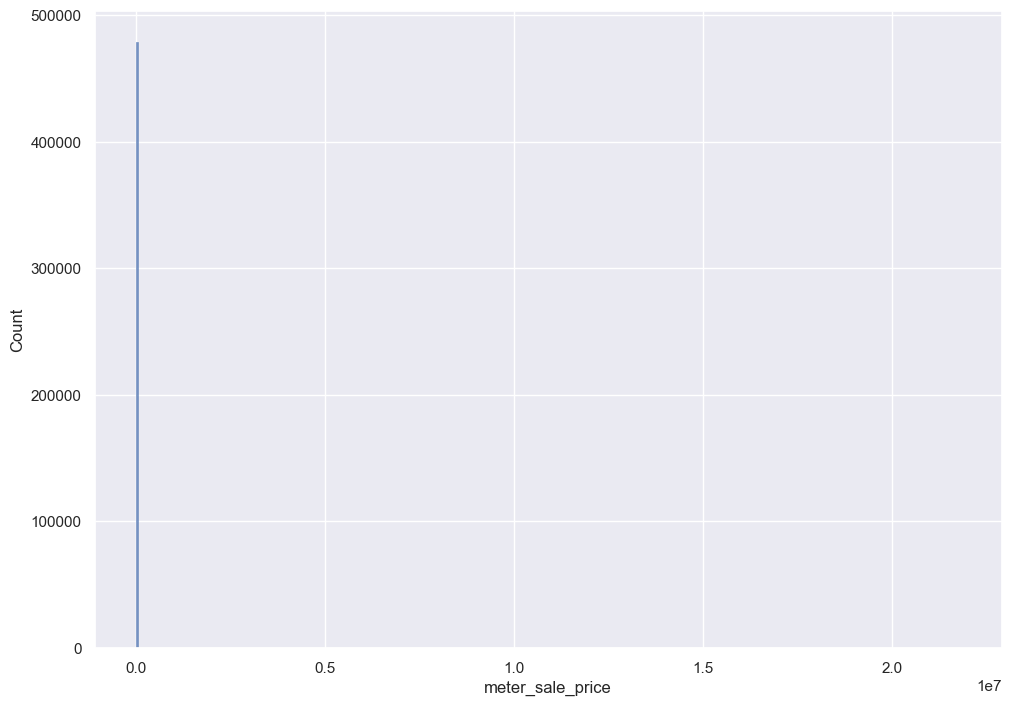

In [6]:
# Проверка на нормальность распределения цены за кв. м.

sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.histplot(DF['meter_sale_price'], bins=300)
plt.show()

<Axes: xlabel='meter_sale_price'>

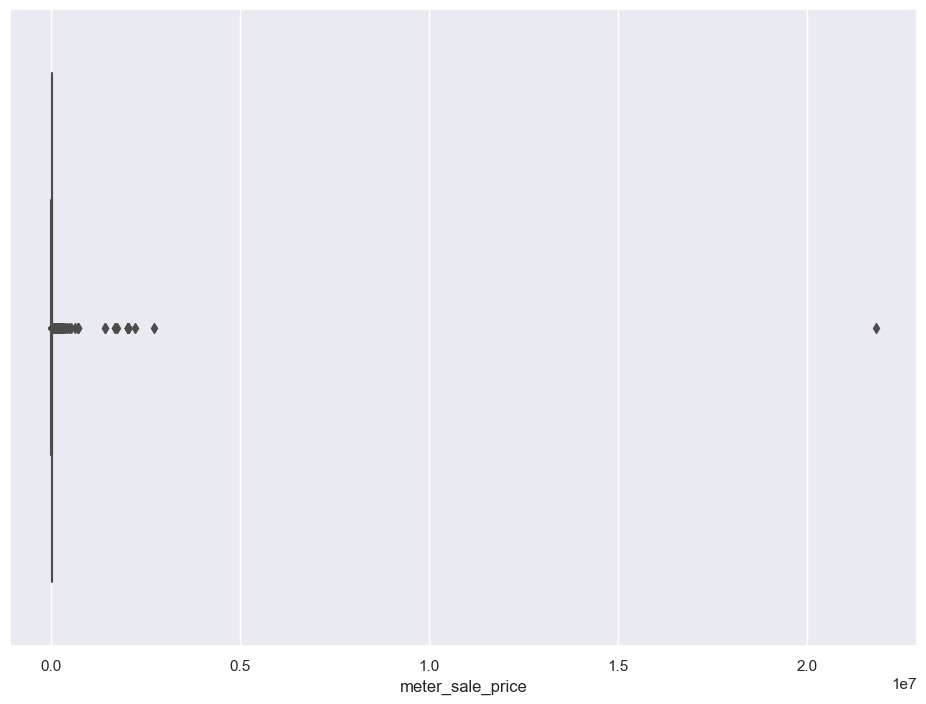

In [7]:
sns.boxplot(x=DF["meter_sale_price"])

In [8]:
# Функция поиска выбросов

def find_outliers_IQR(df):
   q1=df.quantile(0.25)
   q3=df.quantile(0.75)
   IQR=q3-q1
   outliers = df[((df < (q1 - 1.5 * IQR)) | (df > (q3 + 1.5 * IQR)))]
   return outliers

In [9]:
outliers = find_outliers_IQR(DF['meter_sale_price'])

print('number of rows: '+ str(len(DF['meter_sale_price'])))

print('number of outliers: '+ str(len(outliers)))

print('max outlier value: '+ str(outliers.max()))

print('min outlier value: '+ str(outliers.min()))

number of rows: 479529
number of outliers: 20346
max outlier value: 21811987.51
min outlier value: 25944.08


In [10]:
# Избавляемся от выбросов

cols = ['meter_sale_price'] # one or more

Q1 = DF[cols].quantile(0.25)
Q3 = DF[cols].quantile(0.75)
IQR = Q3 - Q1

DF = DF[~((DF[cols] < (Q1 - 1.5 * IQR)) |(DF[cols] > (Q3 + 1.5 * IQR))).any(axis=1)]

<Axes: xlabel='meter_sale_price'>

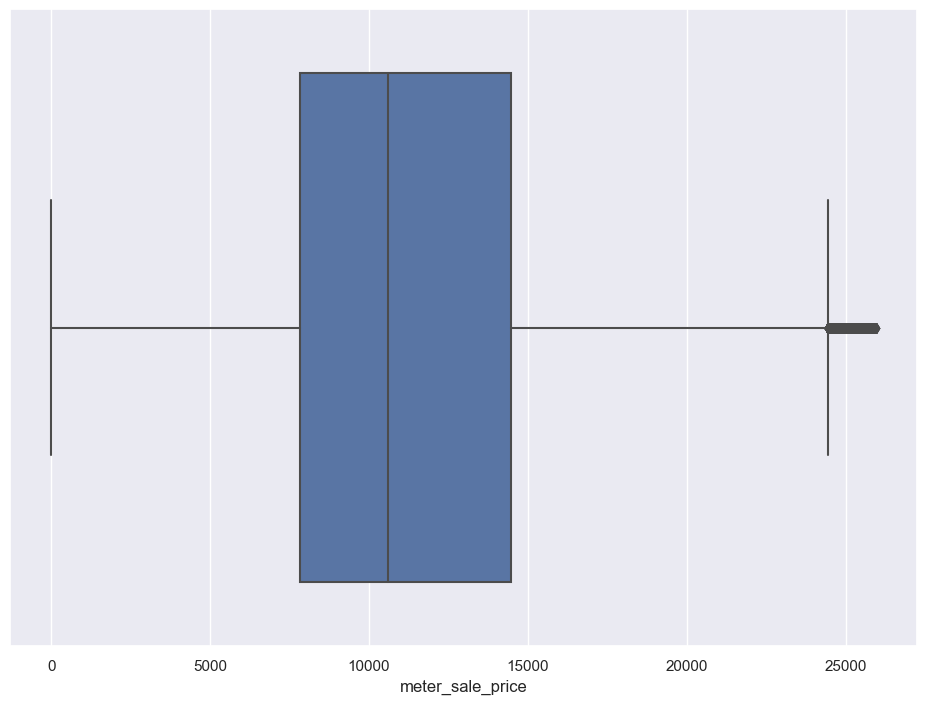

In [11]:
sns.boxplot(x=DF["meter_sale_price"])

<Axes: xlabel='meter_sale_price', ylabel='Count'>

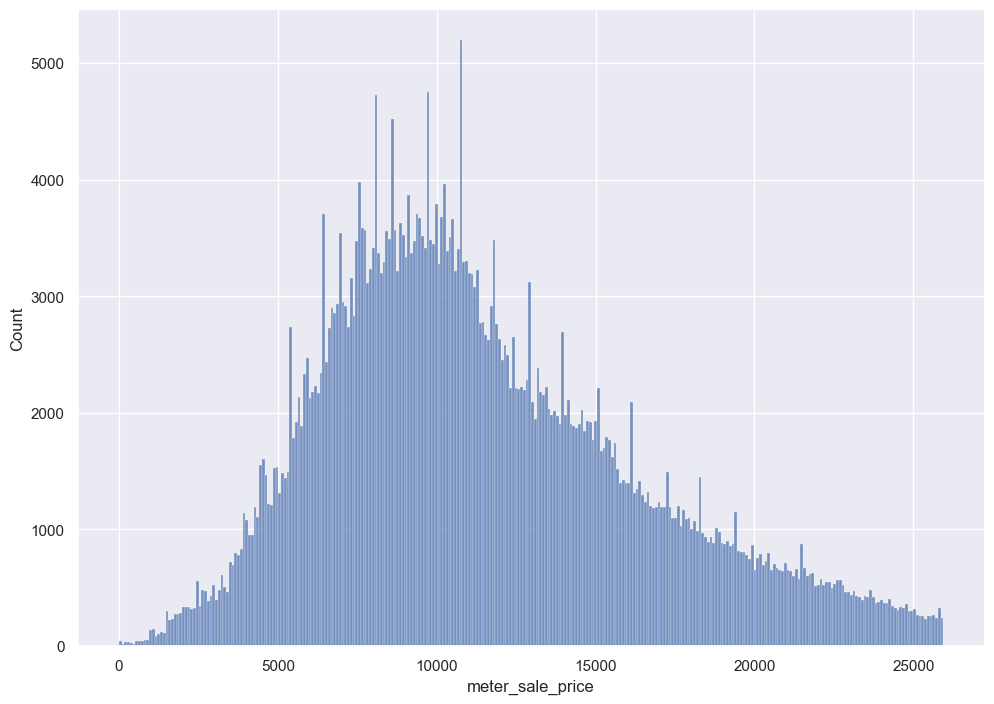

In [12]:
sns.histplot(DF['meter_sale_price'], bins=300)


#### 3.1.2 Площадь

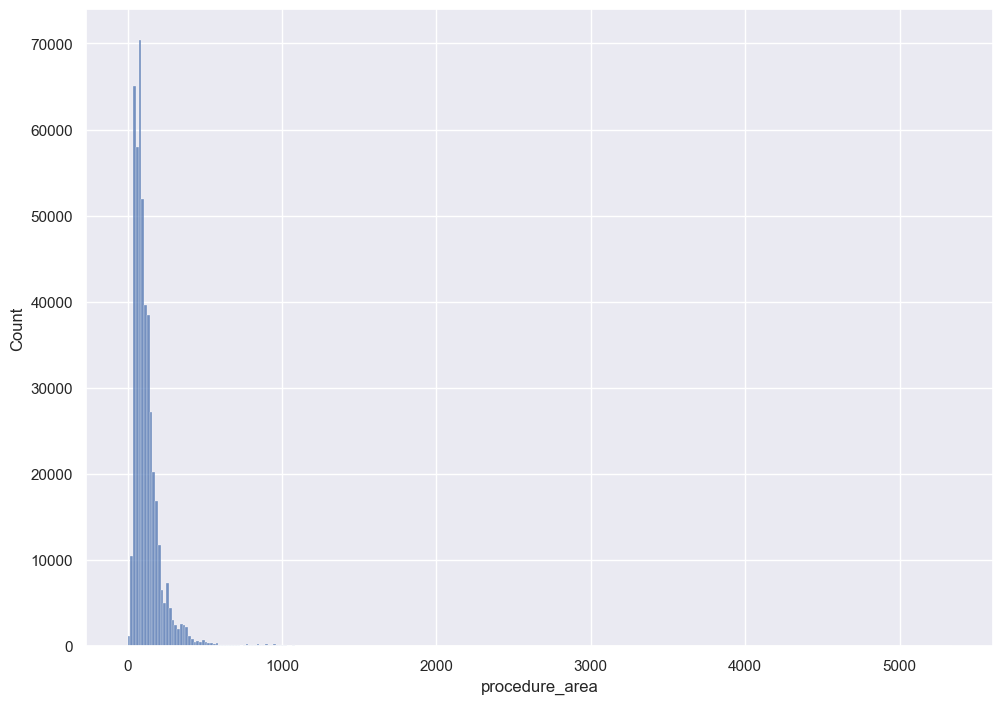

In [13]:
# Проверка на нормальность распределения площади

sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.histplot(DF['procedure_area'], bins=300)
plt.show()

<Axes: xlabel='procedure_area'>

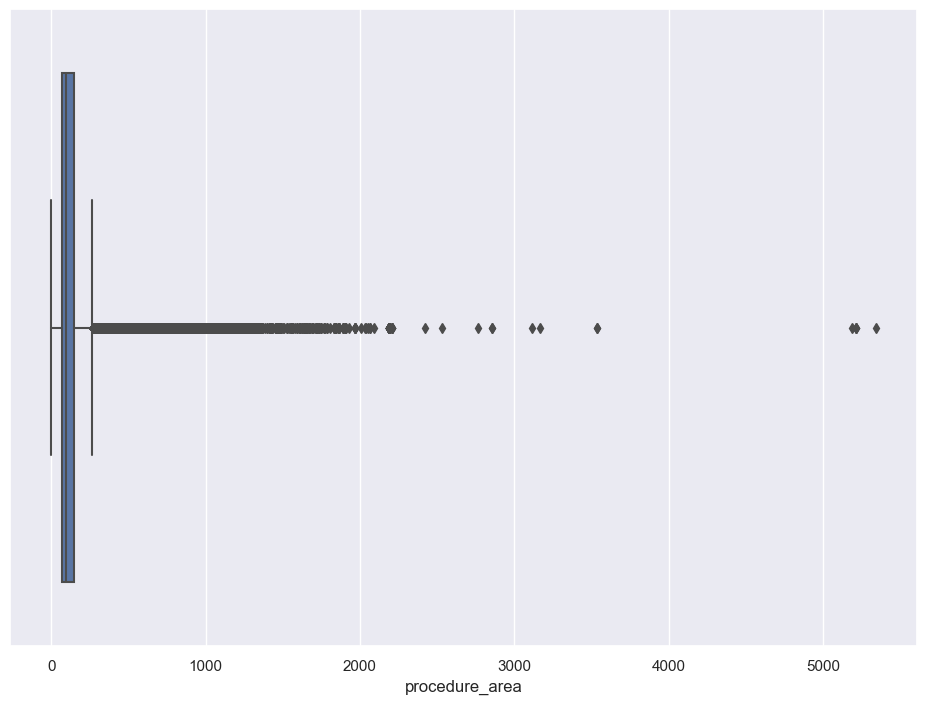

In [14]:
sns.boxplot(x=DF["procedure_area"])

In [15]:
outliers_sq = find_outliers_IQR(DF['procedure_area'])

print('number of rows: '+ str(len(DF['procedure_area'])))

print('number of outliers: '+ str(len(outliers_sq)))

print('max outlier value: '+ str(outliers_sq.max()))

print('min outlier value: '+ str(outliers_sq.min()))

number of rows: 459183
number of outliers: 29235
max outlier value: 5339.17
min outlier value: 267.7


In [16]:
# Избавляемся от выбросов

cols = ['procedure_area'] # one or more

Q1 = DF[cols].quantile(0.25)
Q3 = DF[cols].quantile(0.75)
IQR = Q3 - Q1

DF = DF[~((DF[cols] < (Q1 - 1.5 * IQR)) |(DF[cols] > (Q3 + 1.5 * IQR))).any(axis=1)]

<Axes: xlabel='procedure_area', ylabel='Count'>

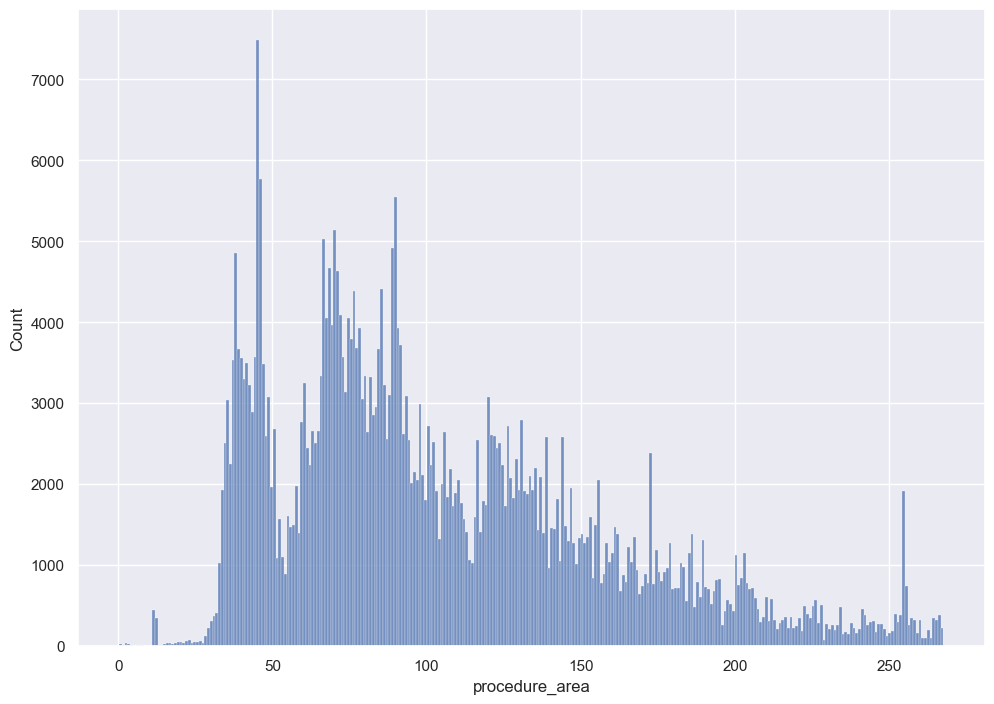

In [17]:
sns.histplot(DF['procedure_area'], bins=300)

<Axes: xlabel='procedure_area'>

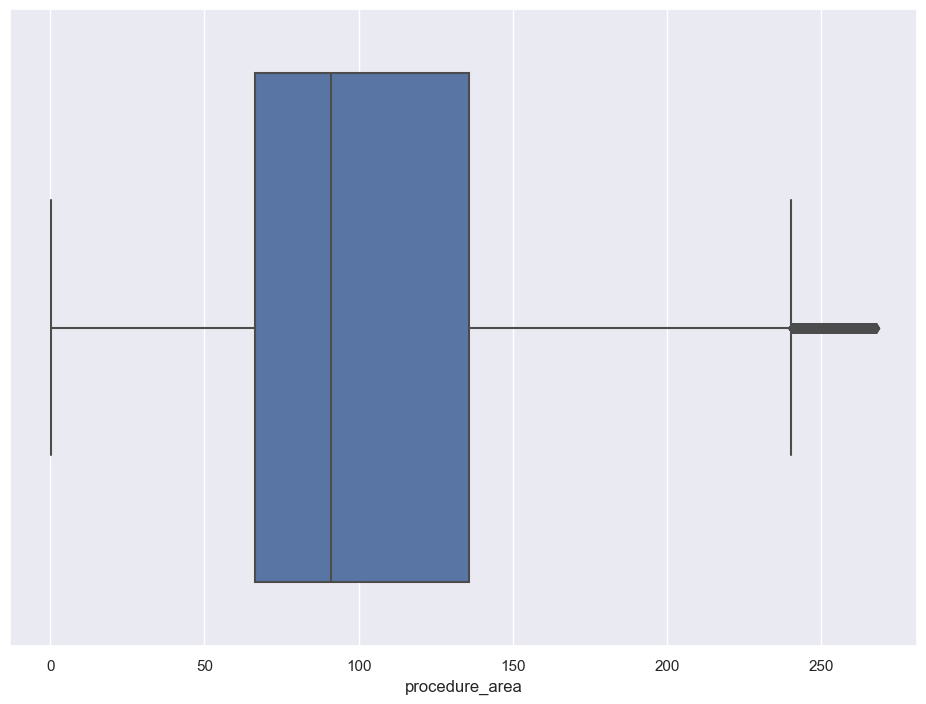

In [18]:
sns.boxplot(x=DF["procedure_area"])

### 3.2 Тренд изменения цены

In [19]:
price_trend_data = DF.groupby([DF['instance_date'].dt.date, 'property_sub_type_en']).mean()

flats = DF[DF['property_sub_type_en'] == 'Flat']
price_trend_data_flats = flats.groupby([DF['instance_date'].dt.date]).mean()

/var/folders/9f/500sy9zd7rz3wynbf95sk3q40000gq/T/ipykernel_16146/2387785675.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  price_trend_data = DF.groupby([DF['instance_date'].dt.date, 'property_sub_type_en']).mean()
/var/folders/9f/500sy9zd7rz3wynbf95sk3q40000gq/T/ipykernel_16146/2387785675.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  price_trend_data_flats = flats.groupby([DF['instance_date'].dt.date]).mean()


In [20]:
price_trend_data

procedure_area  meter_sale_price  \
instance_date property_sub_type_en                                     
2004-05-05    Flat                      143.037500       8856.695000   
              Villa                            NaN               NaN   
2004-05-06    Flat                      167.440000       7754.200000   
              Villa                            NaN               NaN   
2004-05-22    Flat                      175.290000       7986.760000   
...                                            ...               ...   
2023-04-12    Villa                     215.240000      10830.706250   
2023-04-13    Flat                       91.120067      13059.432886   
              Villa                     201.038000       9874.826000   
2023-04-14    Flat                       78.150476      14213.263810   
              Villa                            NaN               NaN   

                                    distance_to_metro  distance_to_landmark  \
instance_date property_sub_type_en                                            
2004-05-05    Flat                           0.000000           8148.440930   
              Villa                               NaN                   NaN   
2004-05-06    Flat                           0.000000           8148.440930   
              Villa                               NaN                   NaN   
2004-05-22    Flat                           0.000000           8148.440930   
...                                               ...                   ...   
2023-04-12    Villa                       5786.374551           4770.794115   
2023-04-13    Flat                        4800.482688           4232.542057   
              Villa                       9490.685805           5375.444604   
2023-04-14    Flat                       15176.312546           3763.510715   
              Villa                               NaN                   NaN   

                                    distance_to_mall  
instance_date property_sub_type_en                    
2004-05-05    Flat                       3593.510772  
              Villa                              NaN  
2004-05-06    Flat                       3593.510772  
              Villa                              NaN  
2004-05-22    Flat                       3593.510772  
...                                              ...  
2023-04-12    Villa                      6003.055597  
2023-04-13    Flat                       4716.186922  
              Villa                      4831.805087  
2023-04-14    Flat                       6484.509653  
              Villa                              NaN  

[9028 rows x 5 columns]

<Axes: xlabel='instance_date', ylabel='meter_sale_price'>

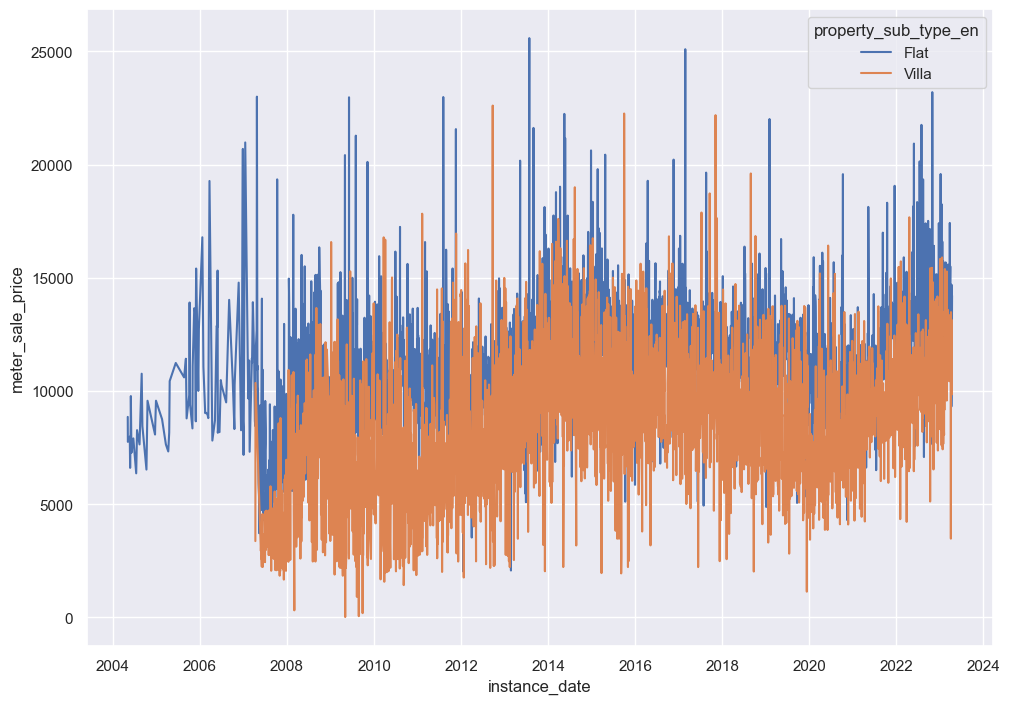

In [21]:
sns.lineplot(x = 'instance_date', y = 'meter_sale_price', data = price_trend_data, hue = 'property_sub_type_en')
#sns.lmplot(x = 'instance_date', y = 'meter_sale_price', data = price_trend_data_flats)


### 3.3 Описательная статистика

In [22]:
# Уникальные категории типа транзакции

print(DF['trans_group_en'].unique())

['Sales', 'Mortgages', 'Gifts']
Categories (3, object): ['Gifts', 'Mortgages', 'Sales']


In [23]:
# Период данных

print('Min Date:', DF['instance_date'].min())
print('Max Date:', DF['instance_date'].max())

Min Date: 2004-05-05 00:00:00
Max Date: 2023-04-14 00:00:00


In [24]:
# Уникальные категории подтипа недвижимости

print(DF['property_sub_type_en'].unique())

['Villa', 'Flat']
Categories (2, object): ['Flat', 'Villa']


In [25]:
# Уникальные категории типа назначения помещения

print(DF['property_usage_en'].unique())

['Residential', 'Commercial']
Categories (3, object): ['Commercial', 'Other', 'Residential']


In [26]:
# Уникальные категории типа готовности

print(DF['reg_type_en'].unique())

['Existing Properties', 'Off-Plan Properties']
Categories (2, object): ['Existing Properties', 'Off-Plan Properties']


In [27]:
# Уникальные категории района

print(DF['area_name_en'].unique())

['Al Thanayah Fourth', 'Al Thanyah Third', 'Al Barsha South Fourth', 'Mirdif', 'Dubai Investment Park First', ..., 'Al Kifaf', 'Madinat Dubai Almelaheyah', 'Al Safouh Second', 'Jabal Ali', 'Um Hurair Second']
Length: 33
Categories (34, object): ['Al Barsha South Fifth', 'Al Barsha South Fourth', 'Al Barshaa South Second', 'Al Barshaa South Third', ..., 'Nad Al Shiba First', 'Palm Jumeirah', 'Um Hurair Second', 'Wadi Al Safa 6']


In [28]:
print(DF['master_project_en'].unique())

['Springs - 5', 'Springs - 7', 'Springs - 2', 'Springs - 1', 'Springs - 3', ..., 'Dubai Health Care City Phase 1', 'Lakes - Ghadeer', 'Jumeirah Park', 'DUBAI HILLS - GOLF GROVE', 'DUBAI HILLS - CLUB VILLAS']
Length: 58
Categories (71, object): ['Al Furjan', 'Arabian Ranches - Saheel', 'Arjan', 'Burj Khalifa', ..., 'The Lagoons', 'Uptown Mirdif', 'Wasl 1', 'Wasl Gate']


In [29]:
# Описательная статистика площади

DF['procedure_area'].describe()

count    429948.000000
mean        104.713423
std          53.183040
min           0.300000
25%          66.260000
50%          91.140000
75%         135.920000
max         267.670000
Name: procedure_area, dtype: float64

In [30]:
# Описательная статистика стоимости

DF['meter_sale_price'].describe()

count    429948.000000
mean      11688.072177
std        4904.700567
min           0.010000
25%        8070.000000
50%       10764.210000
75%       14675.042500
max       25943.400000
Name: meter_sale_price, dtype: float64

In [31]:
# Описательная статистика расстояния до метро, в метрах

DF['distance_to_metro'].describe()

count    429948.000000
mean       4225.449415
std        5349.751432
min           0.000000
25%         695.155326
50%        1744.005562
75%        6175.706636
max       25307.077838
Name: distance_to_metro, dtype: float64

In [32]:
# Описательная статистика расстояния до достопримечательности, в метрах

DF['distance_to_landmark'].describe()

count    429948.000000
mean       5069.912756
std        3512.213132
min           0.000000
25%        1558.512474
50%        5513.633151
75%        8344.028669
max       15091.771997
Name: distance_to_landmark, dtype: float64

In [33]:
# Описательная статистика расстояния до ТЦ, в метрах

DF['distance_to_mall'].describe()

count    429948.000000
mean       3738.274670
std        3158.845152
min         421.836071
25%         739.178337
50%        3256.614794
75%        6687.332455
max       11629.098059
Name: distance_to_mall, dtype: float64

### 3.4 Корреляция

<Axes: >

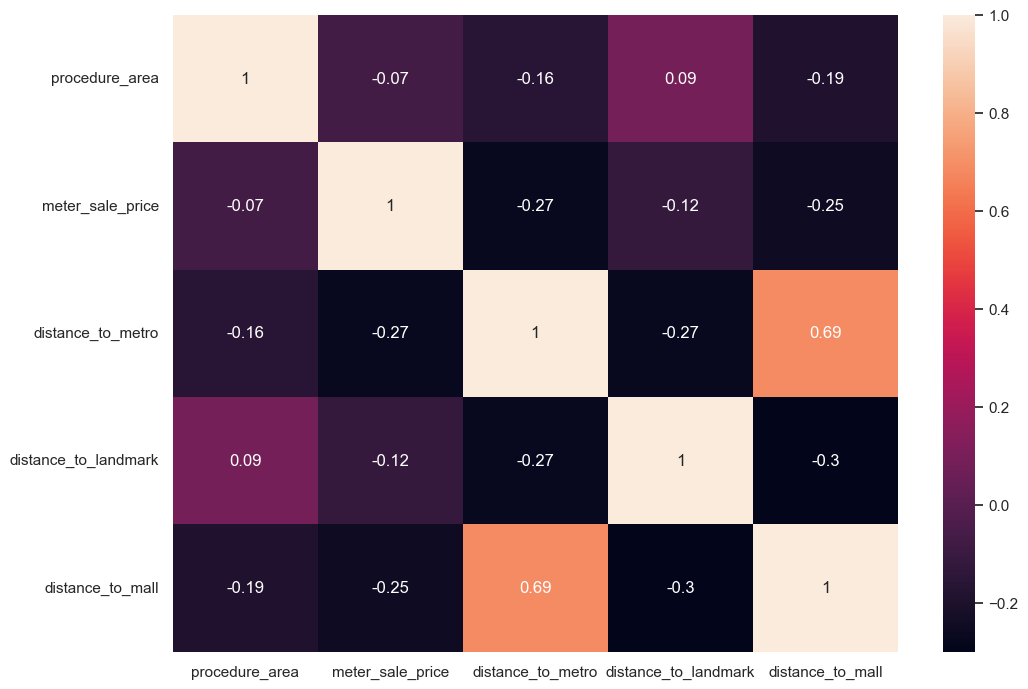

In [34]:
# Корреляция для числовых признаков

correlation_matrix = DF.corr(numeric_only = True).round(2)
sns.heatmap(data=correlation_matrix, annot=True)

### 3.3 Корреляция

In [35]:
DF.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 429948 entries, 2 to 479528
Data columns (total 18 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   trans_group_en        429948 non-null  category      
 1   procedure_name_en     429948 non-null  category      
 2   instance_date         429948 non-null  datetime64[ns]
 3   property_sub_type_en  429948 non-null  category      
 4   property_usage_en     429948 non-null  category      
 5   reg_type_en           429948 non-null  category      
 6   area_name_en          429948 non-null  category      
 7   master_project_en     429948 non-null  category      
 8   nearest_landmark_en   429948 non-null  category      
 9   nearest_metro_en      429948 non-null  category      
 10  nearest_mall_en       429948 non-null  category      
 11  rooms_en              429948 non-null  category      
 12  has_parking           429948 non-null  category      
 13 

In [36]:
# Медианная цена по типу транзакции
means_by_trans_group_en = DF.groupby('trans_group_en', as_index=False)['meter_sale_price'].mean(numeric_only = True)
means_by_trans_group_en


trans_group_en  meter_sale_price
0          Gifts      12070.878418
1      Mortgages       9403.486720
2          Sales      12212.357138

In [37]:
# Медианная цена по типу процедуры
means_by_procedure_name_en = DF.groupby('procedure_name_en', as_index=False)['meter_sale_price'].mean(numeric_only = True)
means_by_procedure_name_en


procedure_name_en  meter_sale_price
0                          Delayed Development       7818.083636
1                  Delayed Lease to Own Modify       6922.160000
2            Delayed Lease to Own Registration      10955.322823
3                             Delayed Mortgage       8578.441604
4                                 Delayed Sell      13053.969006
5       Delayed Sell Lease to Own Registration      10126.374500
6                         Development Mortgage       7095.602643
7                     Development Registration       7023.415790
8    Development Registration Pre-Registration       7732.472391
9                                        Grant      12025.863736
10                           Grant Development      11639.354375
11                      Grant Pre-Registration      13778.523951
12                       Grant on Delayed Sell      11481.146169
13                    Lease Development Modify               NaN
14              Lease Development Registration       7810.885294
15                  Lease Finance Modification      10452.075278
16                  Lease Finance Registration       7982.171818
17                         Lease to Own Modify       9894.662843
18                   Lease to Own Registration       9979.433043
19  Lease to Own Registration Pre-Registration      11409.669820
20                       Lease to Own Transfer       4251.056929
21    Lease to Own on Development Modification               NaN
22    Lease to Own on Development Registration       8937.601200
23                    Modify Delayed Mortgage        7038.335000
24                 Modify Development Mortgage       9826.629375
25                             Modify Mortgage      10951.541312
26            Modify Mortgage Pre-Registration       8352.347273
27                   Mortgage Pre-Registration       9780.919902
28                       Mortgage Registration       9418.872204
29                           Mortgage Transfer      10167.155366
30          Mortgage Transfer Pre-Registration       8174.403226
31                        Sale On Payment Plan      14379.303077
32                                        Sell      11178.722545
33                     Sell - Pre registration      13575.876522
34                            Sell Development       9252.267374
35         Sell Development - Pre Registration       7070.522727
36               Transfer Development Mortgage               NaN

In [38]:
# Медианная цена по категориям недвижимости
means_by_property_sub_type_en = DF.groupby('property_sub_type_en', as_index=False)['meter_sale_price'].mean(numeric_only = True)
means_by_property_sub_type_en


property_sub_type_en  meter_sale_price
0                 Flat      11816.153372
1                Villa       8483.127486

In [39]:
# Медианная цена по категориям недвижимости
means_by_property_sub_type_en = DF.groupby('property_sub_type_en', as_index=False)['meter_sale_price'].mean(numeric_only = True)
means_by_property_sub_type_en


property_sub_type_en  meter_sale_price
0                 Flat      11816.153372
1                Villa       8483.127486

In [40]:
# Медианная цена по категориям назначения
means_by_property_usage_en = DF.groupby('property_usage_en', as_index=False)['meter_sale_price'].mean(numeric_only = True)
means_by_property_usage_en

property_usage_en  meter_sale_price
0        Commercial       6015.073333
1             Other               NaN
2       Residential      11688.190931

In [41]:
# Медианная цена по категориям готовности проекта
means_by_reg_type_en = DF.groupby('reg_type_en', as_index=False)['meter_sale_price'].mean(numeric_only = True)
means_by_reg_type_en


reg_type_en  meter_sale_price
0  Existing Properties      10846.375347
1  Off-Plan Properties      13433.658403

In [42]:
# Медианная цена по району
means_by_area_name_en = DF.groupby('area_name_en', as_index=False)['meter_sale_price'].mean(numeric_only = True).sort_values('meter_sale_price', ascending=False)
means_by_area_name_en


area_name_en  meter_sale_price
32                   Um Hurair Second      21581.629878
12                   Al Safouh Second      20454.697388
26          Madinat Dubai Almelaheyah      18532.713092
8                    Al Khairan First      17572.518013
19                       Burj Khalifa      16815.459691
18                            Al Wasl      15499.891366
10                           Al Kifaf      15101.308403
20                       Business Bay      14951.996517
22  Hadaeq Sheikh Mohammed Bin Rashid      14170.084836
31                      Palm Jumeirah      13642.717221
7                            Al Jadaf      13139.201021
27                        Marsa Dubai      12349.541749
9                          Al Kheeran      12314.131916
11                    Al Safouh First      11961.239058
23                          Jabal Ali      11475.505977
25        Jabal Ali Industrial Second      11177.701126
16                   Al Thanyah Third      11055.426754
3              Al Barshaa South Third      10824.963613
15                   Al Thanyah First      10642.945967
0               Al Barsha South Fifth      10559.342659
2             Al Barshaa South Second      10337.414791
30                 Nad Al Shiba First      10324.180074
14                   Al Thanyah Fifth       9903.896261
28                     Me'Aisem First       9740.717961
5                    Al Hebiah Fourth       9559.674254
1              Al Barsha South Fourth       9335.635872
6                    Al Hebiah Second       8960.491224
21        Dubai Investment Park First       8803.110436
29                             Mirdif       8637.485173
24                    Jabal Ali First       8491.502161
4                     Al Hebiah First       7901.588216
13                 Al Thanayah Fourth       6623.366746
17                    Al Warsan First       6190.020375
33                     Wadi Al Safa 6               NaN

In [43]:
# Медианная цена по комнатности
means_by_rooms_en = DF.groupby('rooms_en', as_index=False)['meter_sale_price'].mean(numeric_only = True).sort_values('meter_sale_price', ascending=False)
means_by_rooms_en


rooms_en  meter_sale_price
10    PENTHOUSE      12173.994364
1         2 B/R      11980.732816
0         1 B/R      11669.277468
2         3 B/R      11584.984898
13       Studio      11452.330230
3         4 B/R      10034.308288
9        Office       9528.190000
11         Shop       9469.388095
4         5 B/R       9346.614040
5         6 B/R       9075.097273
12  Single Room       7759.643407
6         7 B/R               NaN
7         8 B/R               NaN
8         9 B/R               NaN

In [44]:
# Медианная цена по присутствию машиноместа
means_by_has_parking = DF.groupby('has_parking', as_index=False)['meter_sale_price'].mean(numeric_only = True).sort_values('meter_sale_price', ascending=False)
means_by_has_parking


has_parking  meter_sale_price
1           1      12113.538395
0           0       9073.144323

### 3.2 Визуализация

In [92]:
# Размер надписей на графиках
PLOT_LABEL_FONT_SIZE = 14 
# Генерация цветовой схемы
# Возвращает список цветов
def getColors(n):
    COLORS = []
    cm = plt.cm.get_cmap('hsv', n)
    for i in np.arange(n):
        COLORS.append(cm(i))
    return COLORS

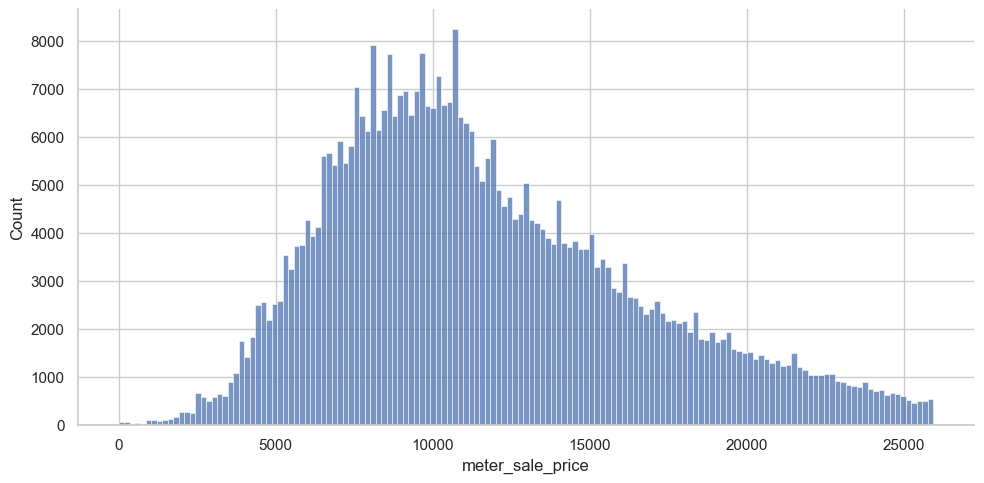

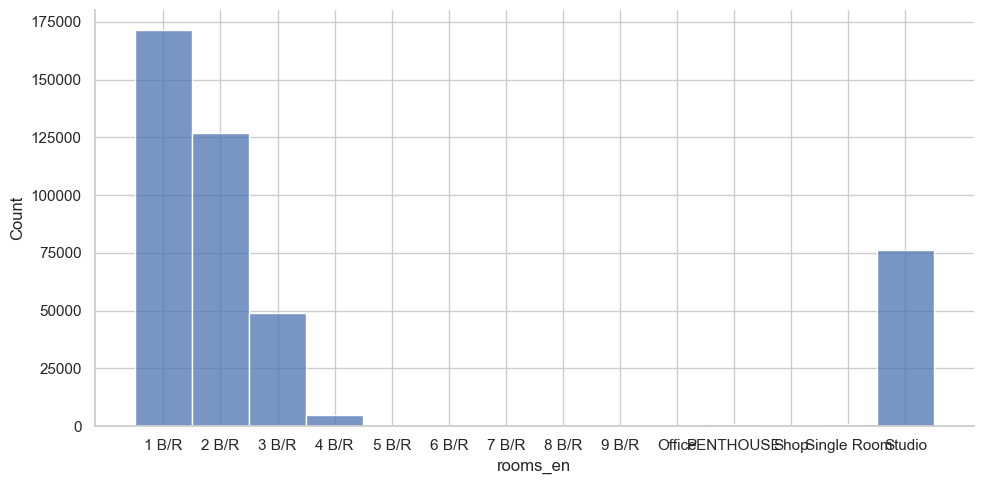

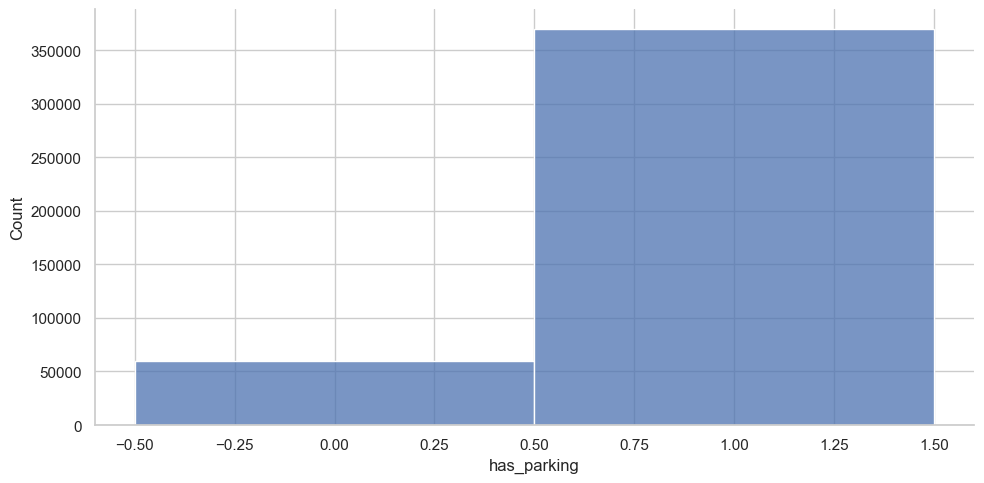

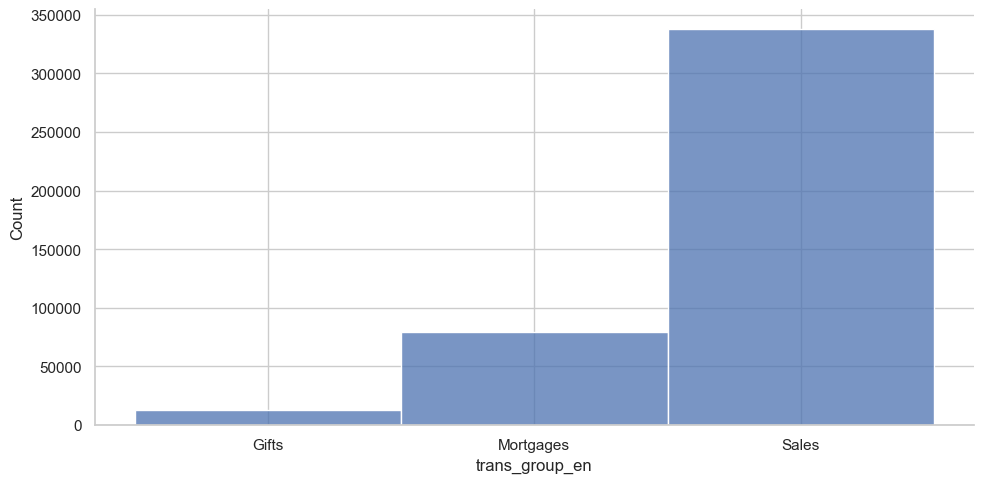

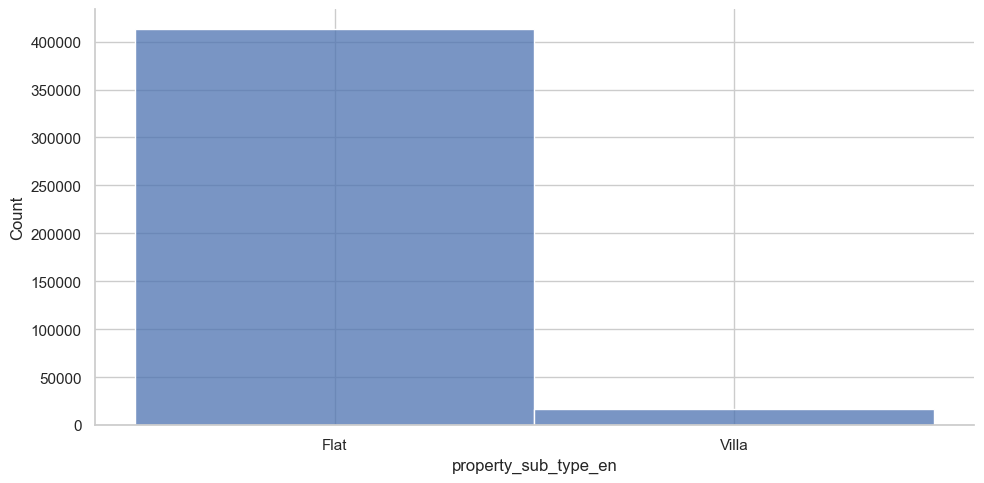

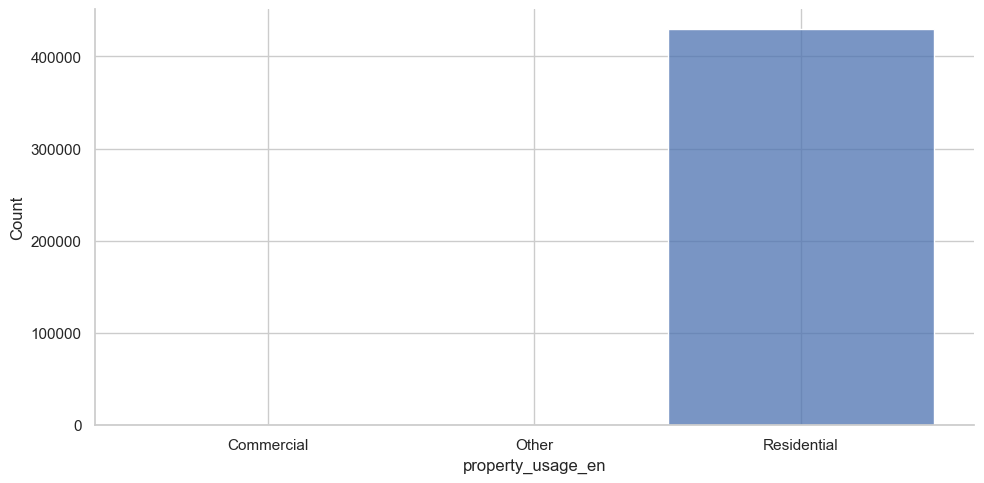

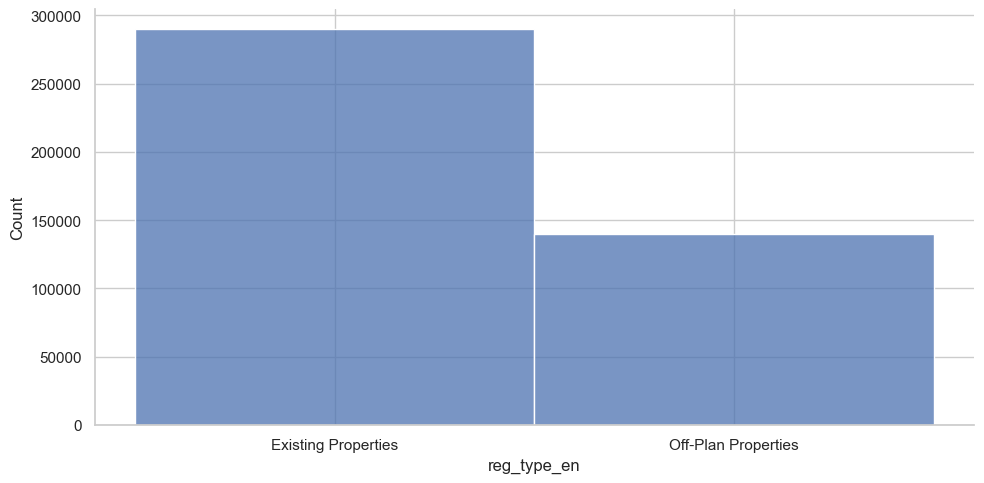

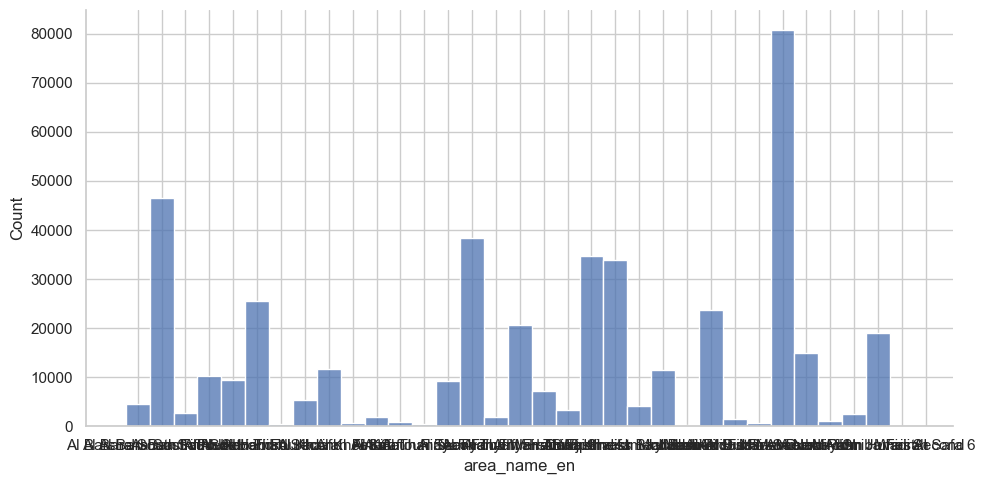

In [93]:
sns.set_style("whitegrid")

sns.displot(DF, x="meter_sale_price", kde=False, height=5, aspect=2)
sns.displot(DF, x="rooms_en", kde=False, height=5, aspect=2)
sns.displot(DF, x="has_parking", kde=False, height=5, aspect=2)
sns.displot(DF, x="trans_group_en", kde=False, height=5, aspect=2)
sns.displot(DF, x="property_sub_type_en", kde=False, height=5, aspect=2)
sns.displot(DF, x="property_usage_en", kde=False, height=5, aspect=2)
sns.displot(DF, x="reg_type_en", kde=False, height=5, aspect=2)
sns.displot(DF, x="area_name_en", kde=False, height=5, aspect=2)

## 4. Регрессия и модели машинного обучения

### 4.1 Линейная регрессия


In [45]:
from sklearn.linear_model import LinearRegression

In [46]:
DF_numeric = DF.select_dtypes(include=np.number)

In [47]:
DF_numeric

procedure_area  meter_sale_price  distance_to_metro  \
2               257.69           2568.54        4019.665126   
5               172.53          10323.13        4019.665126   
8               254.28           7078.81        4775.360648   
10              231.53           7342.46        4775.360648   
14              172.52           3494.60        4775.360648   
...                ...               ...                ...   
479524           58.03          14147.85        6175.706636   
479525          103.29          17609.53        2941.699306   
479526           59.66          23481.19        2941.699306   
479527           65.53          23178.51        2941.699306   
479528           93.00           5649.00        4869.228099   

        distance_to_landmark  distance_to_mall  
2                4079.460028       4736.895258  
5                4079.460028       4736.895258  
8                3713.843980       5177.005216  
10               3713.843980       5177.005216  
14               3713.843980       5177.005216  
...                      ...               ...  
479524           2261.982665       6493.259126  
479525           6113.173101       5621.592002  
479526           6113.173101       5621.592002  
479527           6113.173101       5621.592002  
479528           8747.277967       1280.954032  

[429948 rows x 5 columns]

In [48]:
DF_categorical = DF.select_dtypes(include='category')

In [49]:
DF_categorical

trans_group_en          procedure_name_en property_sub_type_en  \
2               Sales  Lease to Own Registration                Villa   
5               Sales                       Sell                Villa   
8               Sales                       Sell                Villa   
10          Mortgages      Mortgage Registration                Villa   
14              Sales                       Sell                Villa   
...               ...                        ...                  ...   
479524          Sales    Sell - Pre registration                 Flat   
479525          Sales    Sell - Pre registration                 Flat   
479526          Sales    Sell - Pre registration                 Flat   
479527          Sales    Sell - Pre registration                 Flat   
479528      Mortgages  Lease to Own Registration                 Flat   

       property_usage_en          reg_type_en            area_name_en  \
2            Residential  Existing Properties      Al Thanayah Fourth   
5            Residential  Existing Properties      Al Thanayah Fourth   
8            Residential  Existing Properties      Al Thanayah Fourth   
10           Residential  Existing Properties      Al Thanayah Fourth   
14           Residential  Existing Properties      Al Thanayah Fourth   
...                  ...                  ...                     ...   
479524       Residential  Off-Plan Properties  Al Barsha South Fourth   
479525       Residential  Off-Plan Properties        Al Khairan First   
479526       Residential  Off-Plan Properties        Al Khairan First   
479527       Residential  Off-Plan Properties        Al Khairan First   
479528       Residential  Existing Properties         Jabal Ali First   

              master_project_en           nearest_landmark_en  \
2                   Springs - 5  Sports City Swimming Academy   
5                   Springs - 5  Sports City Swimming Academy   
8                   Springs - 7  Sports City Swimming Academy   
10                  Springs - 7  Sports City Swimming Academy   
14                  Springs - 7  Sports City Swimming Academy   
...                         ...                           ...   
479524  Jumeirah Village Circle  Sports City Swimming Academy   
479525              The Lagoons   Dubai International Airport   
479526              The Lagoons   Dubai International Airport   
479527              The Lagoons   Dubai International Airport   
479528        Discovery Gardens  Sports City Swimming Academy   

             nearest_metro_en       nearest_mall_en rooms_en has_parking  
2       Nakheel Metro Station           Marina Mall    3 B/R           0  
5       Nakheel Metro Station           Marina Mall    2 B/R           0  
8            Damac Properties           Marina Mall    2 B/R           0  
10           Damac Properties           Marina Mall    2 B/R           0  
14           Damac Properties           Marina Mall    2 B/R           0  
...                       ...                   ...      ...         ...  
479524    Dubai Internet City  Mall of the Emirates   Studio           1  
479525    Creek Metro Station    City Centre Mirdif    2 B/R           1  
479526    Creek Metro Station    City Centre Mirdif    1 B/R           1  
479527    Creek Metro Station    City Centre Mirdif    1 B/R           1  
479528          Harbour Tower    Ibn-e-Battuta Mall    1 B/R           0  

[429948 rows x 12 columns]

In [50]:
DF_categorical_dummues = pd.get_dummies(data=DF_categorical, drop_first=True)

In [51]:
DF_categorical_dummues

trans_group_en_Mortgages  trans_group_en_Sales  \
2                              0                     1   
5                              0                     1   
8                              0                     1   
10                             1                     0   
14                             0                     1   
...                          ...                   ...   
479524                         0                     1   
479525                         0                     1   
479526                         0                     1   
479527                         0                     1   
479528                         1                     0   

        procedure_name_en_Delayed Lease to Own Modify  \
2                                                   0   
5                                                   0   
8                                                   0   
10                                                  0   
14                                                  0   
...                                               ...   
479524                                              0   
479525                                              0   
479526                                              0   
479527                                              0   
479528                                              0   

        procedure_name_en_Delayed Lease to Own Registration  \
2                                                       0     
5                                                       0     
8                                                       0     
10                                                      0     
14                                                      0     
...                                                   ...     
479524                                                  0     
479525                                                  0     
479526                                                  0     
479527                                                  0     
479528                                                  0     

        procedure_name_en_Delayed Mortgage  procedure_name_en_Delayed Sell  \
2                                        0                               0   
5                                        0                               0   
8                                        0                               0   
10                                       0                               0   
14                                       0                               0   
...                                    ...                             ...   
479524                                   0                               0   
479525                                   0                               0   
479526                                   0                               0   
479527                                   0                               0   
479528                                   0                               0   

        procedure_name_en_Delayed Sell Lease to Own Registration  \
2                                                       0          
5                                                       0          
8                                                       0          
10                                                      0          
14                                                      0          
...                                                   ...          
479524                                                  0          
479525                                                  0          
479526                                                  0          
479527                                                  0          
479528                                                  0          

        procedure_name_en_Development Mortgage  \
2                                            0   
5              

In [52]:
DF_for_regression = DF_numeric.join(DF_categorical_dummues)

In [53]:
DF_for_regression

procedure_area  meter_sale_price  distance_to_metro  \
2               257.69           2568.54        4019.665126   
5               172.53          10323.13        4019.665126   
8               254.28           7078.81        4775.360648   
10              231.53           7342.46        4775.360648   
14              172.52           3494.60        4775.360648   
...                ...               ...                ...   
479524           58.03          14147.85        6175.706636   
479525          103.29          17609.53        2941.699306   
479526           59.66          23481.19        2941.699306   
479527           65.53          23178.51        2941.699306   
479528           93.00           5649.00        4869.228099   

        distance_to_landmark  distance_to_mall  trans_group_en_Mortgages  \
2                4079.460028       4736.895258                         0   
5                4079.460028       4736.895258                         0   
8                3713.843980       5177.005216                         0   
10               3713.843980       5177.005216                         1   
14               3713.843980       5177.005216                         0   
...                      ...               ...                       ...   
479524           2261.982665       6493.259126                         0   
479525           6113.173101       5621.592002                         0   
479526           6113.173101       5621.592002                         0   
479527           6113.173101       5621.592002                         0   
479528           8747.277967       1280.954032                         1   

        trans_group_en_Sales  procedure_name_en_Delayed Lease to Own Modify  \
2                          1                                              0   
5                          1                                              0   
8                          1                                              0   
10                         0                                              0   
14                         1                                              0   
...                      ...                                            ...   
479524                     1                                              0   
479525                     1                                              0   
479526                     1                                              0   
479527                     1                                              0   
479528                     0                                              0   

        procedure_name_en_Delayed Lease to Own Registration  \
2                                                       0     
5                                                       0     
8                                                       0     
10                                                      0     
14                                                      0     
...                                                   ...     
479524                                                  0     
479525                                                  0     
479526                                                  0     
479527                                                  0     
479528                                                  0     

        procedure_name_en_Delayed Mortgage  ...  rooms_en_6 B/R  \
2                                        0  ...               0   
5                                        0  ...               0   
8                                        0  ...               0   
10                                       0  ...               0   
14                                       0  ...               0   
...                                    ...  ...             ...   
479524                                   0  ...               0   
479525                                   0  ...               0   
479526                       

In [806]:
#X = DF_numeric.iloc[:, 0].values.reshape(-1, 1)  # values converts it into a numpy array
#Y = DF_numeric.iloc[:, 1].values.reshape(-1, 1)  # -1 means that calculate the dimension of rows, but have 1 column

X = DF_for_regression.drop(columns=['meter_sale_price'])
Y = DF_for_regression['meter_sale_price']

linear_regressor = LinearRegression()  # create object for the class
linear_regressor.fit(X, Y)  # perform linear regression

#print('Intercept: ', linear_regressor.intercept_)
#print('Coef: ', linear_regressor.coef_)

Intercept:  9921.875127811118
Coef:  [-2.75391831e+01 -9.47961782e-02 -1.37418569e+00  2.39369795e+00
 -1.50471350e+03 -3.07460057e+00 -1.35088474e+03 -5.16725869e+02
 -2.68108163e+03  2.21836919e+02 -1.53491034e+03  4.94388368e+02
 -1.76254041e+03  3.78121091e+02 -9.32393010e+02  2.32364846e+03
  1.01031335e+03 -8.93780705e+02 -1.29671207e-09 -2.20072691e+02
 -1.28011735e+03 -2.21471124e+03 -7.66634123e+02 -1.03355613e+03
  1.38531924e+03 -4.68994712e+03  2.55340638e-10  1.71908796e+03
 -1.69209352e+03  2.52261290e+03  1.53490822e+02 -3.85291435e+03
  6.60726377e+02 -1.42814114e+03 -1.68833937e+03 -3.63179356e+03
  2.63670927e+03 -9.51361185e+02  2.56152974e+03  7.88648199e+02
  7.43989345e+01  7.27595761e-12  3.30532232e+03  6.45741238e-11
  1.31473949e+03 -1.41429917e+03 -5.00948304e+03 -3.74778351e+03
 -5.99302652e+03 -8.77108670e+03 -8.71492342e+03 -9.87656949e+03
 -3.89305287e+03  3.09045280e+02 -1.20237229e+03  1.82193162e+02
  1.34791981e+03  9.16786314e+03 -1.26622427e+03  9.7

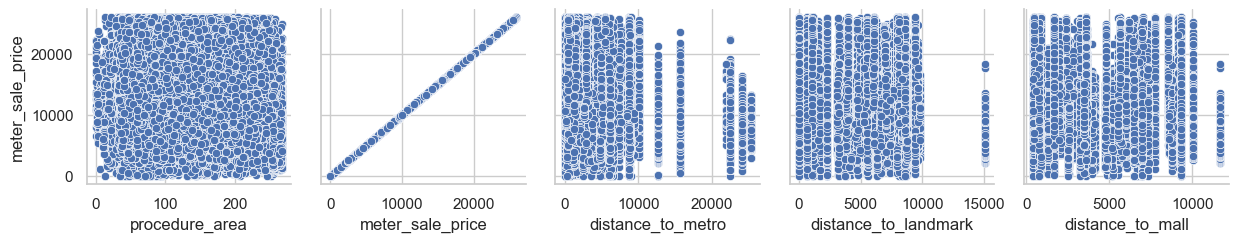

In [103]:
g = sns.PairGrid(DF_numeric, y_vars = ['meter_sale_price'])
g.map(sns.scatterplot)

### 4.2 Catboost
CatBoost — относительно новый алгоритм машинного обучения с открытым исходным кодом, разработанный в 2017 году компанией Яндекс. Яндекс — российский аналог Google, работающий в рамках поисковых и информационных сервисов.

Одним из основных преимуществ CatBoost является его способность интегрировать различные типы данных, такие как изображения, аудио или текстовые функции, в одну структуру. Но CatBoost также предлагает своеобразный способ обработки категориальных данных, требующий минимального преобразования категориальных признаков, в отличие от большинства других алгоритмов машинного обучения, которые не могут обрабатывать нечисловые значения. С точки зрения разработки функций преобразование нечислового состояния в числовые значения может быть очень нетривиальной и утомительной задачей, и CatBoost делает этот шаг устаревшим.

CatBoost основан на теории деревьев решений и повышения градиента.Основная идея бустинга состоит в том, чтобы последовательно объединить множество слабых моделей (модель работает немного лучше, чем случайный случай) и, таким образом, с помощью жадного поиска создать сильную конкурентную прогностическую модель.Поскольку повышение градиента соответствует деревьям решений последовательно, подобранные деревья будут учиться на ошибках прежних деревьев и, следовательно, уменьшать ошибки. Этот процесс добавления новой функции к существующим продолжается до тех пор, пока выбранная функция потерь не перестанет быть минимизированной.

In [54]:
DF.head()

trans_group_en          procedure_name_en instance_date  \
2           Sales  Lease to Own Registration    2007-11-22   
5           Sales                       Sell    2007-07-08   
8           Sales                       Sell    2008-06-08   
10      Mortgages      Mortgage Registration    2013-05-08   
14          Sales                       Sell    2008-12-21   

   property_sub_type_en property_usage_en          reg_type_en  \
2                 Villa       Residential  Existing Properties   
5                 Villa       Residential  Existing Properties   
8                 Villa       Residential  Existing Properties   
10                Villa       Residential  Existing Properties   
14                Villa       Residential  Existing Properties   

          area_name_en master_project_en           nearest_landmark_en  \
2   Al Thanayah Fourth       Springs - 5  Sports City Swimming Academy   
5   Al Thanayah Fourth       Springs - 5  Sports City Swimming Academy   
8   Al Thanayah Fourth       Springs - 7  Sports City Swimming Academy   
10  Al Thanayah Fourth       Springs - 7  Sports City Swimming Academy   
14  Al Thanayah Fourth       Springs - 7  Sports City Swimming Academy   

         nearest_metro_en nearest_mall_en rooms_en has_parking  \
2   Nakheel Metro Station     Marina Mall    3 B/R           0   
5   Nakheel Metro Station     Marina Mall    2 B/R           0   
8        Damac Properties     Marina Mall    2 B/R           0   
10       Damac Properties     Marina Mall    2 B/R           0   
14       Damac Properties     Marina Mall    2 B/R           0   

    procedure_area  meter_sale_price  distance_to_metro  distance_to_landmark  \
2           257.69           2568.54        4019.665126           4079.460028   
5           172.53          10323.13        4019.665126           4079.460028   
8           254.28           7078.81        4775.360648           3713.843980   
10          231.53           7342.46        4775.360648           3713.843980   
14          172.52           3494.60        4775.360648           3713.843980   

    distance_to_mall  
2        4736.895258  
5        4736.895258  
8        5177.005216  
10       5177.005216  
14       5177.005216

In [55]:
# Разделим датасет. X - зависимые параметры, Y – целевой параметр (цена).

X = DF.drop(columns=['meter_sale_price', 'instance_date', 'nearest_landmark_en', 'nearest_metro_en', 'nearest_mall_en'])
Y = DF['meter_sale_price']


In [56]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 429948 entries, 2 to 479528
Data columns (total 13 columns):
 #   Column                Non-Null Count   Dtype   
---  ------                --------------   -----   
 0   trans_group_en        429948 non-null  category
 1   procedure_name_en     429948 non-null  category
 2   property_sub_type_en  429948 non-null  category
 3   property_usage_en     429948 non-null  category
 4   reg_type_en           429948 non-null  category
 5   area_name_en          429948 non-null  category
 6   master_project_en     429948 non-null  category
 7   rooms_en              429948 non-null  category
 8   has_parking           429948 non-null  category
 9   procedure_area        429948 non-null  float64 
 10  distance_to_metro     429948 non-null  float64 
 11  distance_to_landmark  429948 non-null  float64 
 12  distance_to_mall      429948 non-null  float64 
dtypes: category(9), float64(4)
memory usage: 36.2 MB


In [57]:
from catboost import CatBoostRegressor, Pool, EFstrType
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error

import shap


In [58]:
shap.initjs()

In [59]:
# Сформируем модель для регрессии
cbr = CatBoostRegressor(n_estimators=300,
                        loss_function='RMSE',
                        learning_rate=0.6,
                        depth=10, 
                        task_type='CPU',
                        random_state=1,
                        verbose=False,
                       )

# Сформируем датасеты для тренировки модели и предсказания
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=1)

# При помощи Pool переведем параметры в формат, подходящий для CatBoost
pool_train = Pool(x_train, y_train,
                  cat_features = [
                      'trans_group_en', 
                      'procedure_name_en', 
                      'property_sub_type_en',
                      'property_usage_en',
                      'reg_type_en',
                      'area_name_en',
                      'master_project_en',
                      'rooms_en',
                      'has_parking',
                  ])

pool_test = Pool(x_test, cat_features = [
                      'trans_group_en', 
                      'procedure_name_en', 
                      'property_sub_type_en',
                      'property_usage_en',
                      'reg_type_en',
                      'area_name_en',
                      'master_project_en',
                      'rooms_en',
                      'has_parking',
                  ])

# Проведем обучение модели
cbr.fit(pool_train)

# Проведем предсказания
y_pred = cbr.predict(pool_test)

# Вычислим эффективность модели
rmse = (np.sqrt(mse(y_test, y_pred)))
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)


print('Testing performance')
print('RMSE: {:.2f}'.format(rmse))
print('R2: {:.2f}'.format(r2))
print('MAE: {:.2f}'.format(mae))


# Кроссвалидация: 10-fold crossvalidation (10 тестовых выборок)
# генерация по параметрам, группировка, средняя цена квадратного метра в течение 3 месяцев до данной транзакции в этом neighborhood, медианная цена квадратного метра with the same number of bedrooms BR

Testing performance
RMSE: 3023.34
R2: 0.62
MAE: 2235.30


In [109]:
# TODO: Тренд цены: на основе транзакций + сезонность
# TODO: В основной датасет добавляем разбивку по месяцам + коэф-ты

In [60]:
Y.describe()

count    429948.000000
mean      11688.072177
std        4904.700567
min           0.010000
25%        8070.000000
50%       10764.210000
75%       14675.042500
max       25943.400000
Name: meter_sale_price, dtype: float64

##### Оценка модели
Видно, что RMSE ниже стандартного отклонения, а R2 достигает 62%, что является высокими показателями. Модель эффективна.

##### Значимость переменных


In [61]:
# Используем DALEX

import dalex as dx

In [62]:
# Оценка качества модели

exp_catboost = dx.Explainer(cbr, x_test, y_test, verbose=False, label="catboost")
exp_catboost.model_performance()

In [63]:
# Важность параметров на целевую переменную

exp_catboost.model_parts().plot()

/Users/de.yakovlev/Library/Python/3.8/lib/python/site-packages/shap/plots/_beeswarm.py:664: UserWarning:

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored



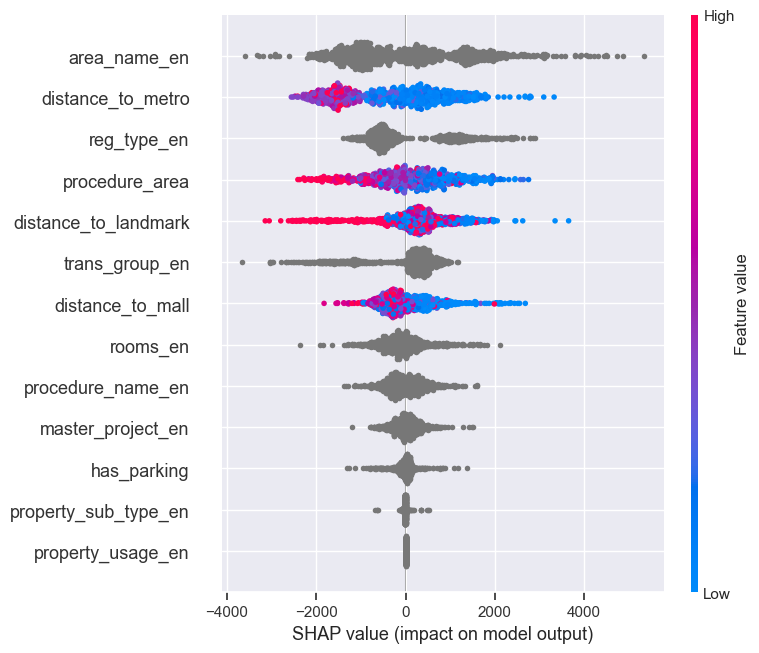

In [64]:
exp_catboost.model_parts(type='shap_wrapper', shap_explainer_type="TreeExplainer").plot()

---

### 4.3 Random Forest

In [65]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import export_graphviz
import graphviz
import pydot

In [66]:
# Возьмем датасет, который мы ранее подготовили. В том числе сделали one-hot коддинг категориальных переменных.

DF_for_regression

procedure_area  meter_sale_price  distance_to_metro  \
2               257.69           2568.54        4019.665126   
5               172.53          10323.13        4019.665126   
8               254.28           7078.81        4775.360648   
10              231.53           7342.46        4775.360648   
14              172.52           3494.60        4775.360648   
...                ...               ...                ...   
479524           58.03          14147.85        6175.706636   
479525          103.29          17609.53        2941.699306   
479526           59.66          23481.19        2941.699306   
479527           65.53          23178.51        2941.699306   
479528           93.00           5649.00        4869.228099   

        distance_to_landmark  distance_to_mall  trans_group_en_Mortgages  \
2                4079.460028       4736.895258                         0   
5                4079.460028       4736.895258                         0   
8                3713.843980       5177.005216                         0   
10               3713.843980       5177.005216                         1   
14               3713.843980       5177.005216                         0   
...                      ...               ...                       ...   
479524           2261.982665       6493.259126                         0   
479525           6113.173101       5621.592002                         0   
479526           6113.173101       5621.592002                         0   
479527           6113.173101       5621.592002                         0   
479528           8747.277967       1280.954032                         1   

        trans_group_en_Sales  procedure_name_en_Delayed Lease to Own Modify  \
2                          1                                              0   
5                          1                                              0   
8                          1                                              0   
10                         0                                              0   
14                         1                                              0   
...                      ...                                            ...   
479524                     1                                              0   
479525                     1                                              0   
479526                     1                                              0   
479527                     1                                              0   
479528                     0                                              0   

        procedure_name_en_Delayed Lease to Own Registration  \
2                                                       0     
5                                                       0     
8                                                       0     
10                                                      0     
14                                                      0     
...                                                   ...     
479524                                                  0     
479525                                                  0     
479526                                                  0     
479527                                                  0     
479528                                                  0     

        procedure_name_en_Delayed Mortgage  ...  rooms_en_6 B/R  \
2                                        0  ...               0   
5                                        0  ...               0   
8                                        0  ...               0   
10                                       0  ...               0   
14                                       0  ...               0   
...                                    ...  ...             ...   
479524                                   0  ...               0   
479525                                   0  ...               0   
479526                       

In [67]:
# Y – массив целевых значений для предсказаний
Y = np.array(DF_for_regression['meter_sale_price'])

# X – массив независимых переменных
X = DF_for_regression.drop('meter_sale_price', axis = 1)

X_list = list(DF_for_regression.columns)

X = np.array(X)

In [68]:
# Сформируем датасеты для тренировки модели и предсказания
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=42)


In [69]:
# Вычислим допустимую ошибку как бенчмарк для модели
baseline_preds = x_test[:, X_list.index('meter_sale_price')]
baseline_errors = abs(baseline_preds - y_test)

print('Baseline error: ', round(np.mean(baseline_errors), 2))


Baseline error:  9357.31


In [70]:
# Создадим random forest модель
rf = RandomForestRegressor(n_estimators = 100, random_state = 42)

# Тренировка модели
rf.fit(x_train, y_train)

RandomForestRegressor(random_state=42)

In [71]:
# Сделаем предсказания
y_pred = rf.predict(x_test)

In [72]:
# Вычислим эффективность модели
rmse = (np.sqrt(mse(y_test, y_pred)))
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print('Testing performance')
print('RMSE: {:.2f}'.format(rmse))
print('R2: {:.2f}'.format(r2))
print('MAE: {:.2f}'.format(mae))

Testing performance
RMSE: 2931.99
R2: 0.64
MAE: 2036.85


In [861]:
X_list = list(DF_for_regression.drop('meter_sale_price', axis = 1).columns)


In [863]:
# Экспорт визуализаци дерева решений. Файл большой, поэтому визуализировать тяжело.
tree = rf.estimators_[5]
export_graphviz(tree, out_file = 'tree.dot', feature_names = X_list, rounded = True, precision = 1)

In [862]:
# Сделаем модель поменьше для визуализации
rf_small = RandomForestRegressor(n_estimators=10, max_depth = 3)
rf_small.fit(x_train, y_train)

RandomForestRegressor(max_depth=3, n_estimators=10)

In [856]:
tree_small = rf_small.estimators_[5]
export_graphviz(tree_small, out_file = 'small_tree.dot', feature_names = X_list, rounded = True, precision = 1)

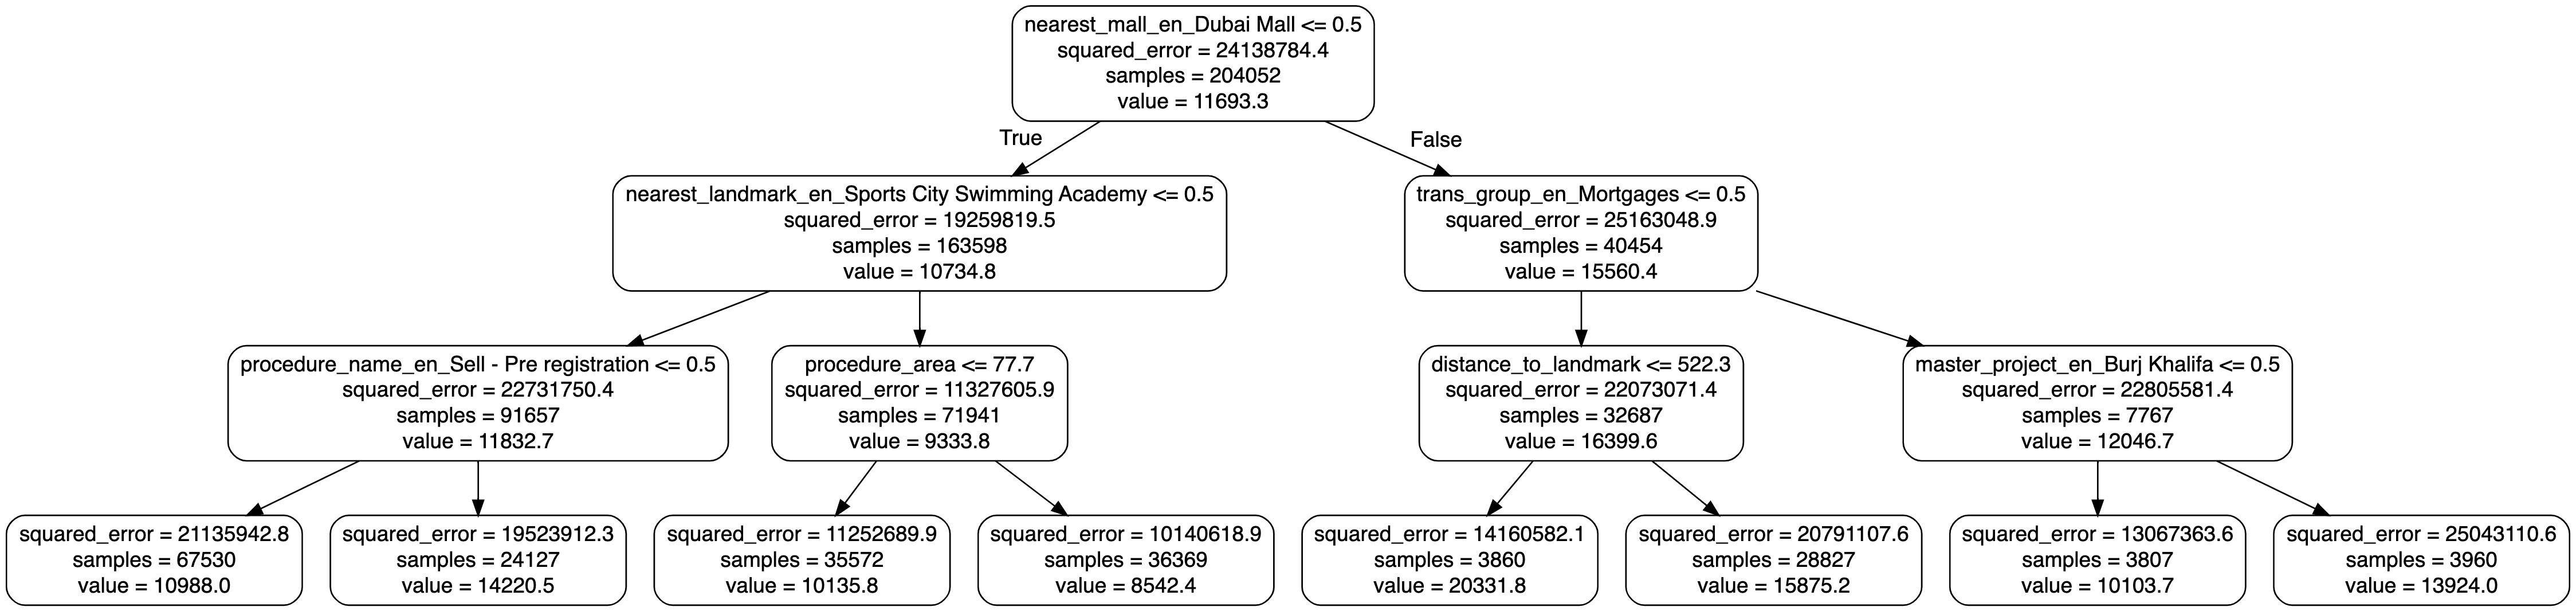

### 4.4 Neural Network на основе библиотеки Keras


In [618]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, BatchNormalization
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from keras.optimizers import SGD

In [619]:
# Разделим датасет. X - зависимые параметры, Y – целевой параметр (цена).

#X = DF.drop(columns=['actual_worth', 'instance_date', 'nearest_landmark_en', 'nearest_metro_en', 'nearest_mall_en'])
X = DF[['procedure_area', 'distance_to_metro', 'distance_to_landmark', 'distance_to_mall']].values
Y = DF['meter_sale_price'].values

In [620]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=1)

In [368]:
# Сформируем датасеты для тренировки модели и предсказания

#data = DF.drop(columns=['instance_date', 'nearest_landmark_en', 'nearest_metro_en', 'nearest_mall_en'])

#train, test = train_test_split(data, test_size=0.2)

In [621]:
# Стандартизация числовых переменных

scaler = StandardScaler()

x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)


#x_train[['procedure_area', 'distance_to_metro', 'distance_to_landmark', 'distance_to_mall']] = scaler.fit_transform(x_train[['procedure_area', 'distance_to_metro', 'distance_to_landmark', 'distance_to_mall']])
#x_test[['procedure_area', 'distance_to_metro', 'distance_to_landmark', 'distance_to_mall']] = scaler.fit_transform(x_test[['procedure_area', 'distance_to_metro', 'distance_to_landmark', 'distance_to_mall']])


In [370]:
# convert the categorical variables to one-hot encoding
#x_train = pd.get_dummies(x_train, columns=['trans_group_en', 'procedure_name_en', 'property_sub_type_en', 'property_usage_en', 'reg_type_en', 'area_name_en', 'master_project_en', 'rooms_en', 'has_parking'])
#x_test = pd.get_dummies(x_test, columns=['trans_group_en', 'procedure_name_en', 'property_sub_type_en', 'property_usage_en', 'reg_type_en', 'area_name_en', 'master_project_en', 'rooms_en', 'has_parking'])

In [622]:
x_train

array([[-0.78309655, -0.69024648, -1.12692024, -0.64581018],
       [ 2.85743077, -0.0793665 , -0.12866188,  0.14043177],
       [ 0.4193921 , -0.65517231, -1.42436912, -1.02212657],
       ...,
       [-1.05136582, -0.69024648, -1.12692024, -0.64581018],
       [ 1.22212177,  0.3712466 , -0.78031913,  0.89302409],
       [-1.23159742, -0.28143978,  1.36238861, -0.36544893]])

In [623]:
# create the neural network model
model = Sequential()
model.add(Dense(400, input_dim=4, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(1, activation='linear'))
opt = SGD(learning_rate=0.01, momentum=0.9)
#model.add(Dense(4, activation='softmax'))
#model.add(Dense(1))
#model.add(BatchNormalization())
#model.add(Dropout(0.5))


In [624]:
y_train

array([17246.91,  3646.63, 19022.39, ..., 20920.42,  5193.8 , 10160.56])

In [625]:
# compile the model

#model.compile(loss='mean_squared_logarithmic_error', optimizer='adam', metrics=['accuracy'])
#model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.compile(loss='mean_squared_logarithmic_error', optimizer=opt, metrics=['mse'])


In [626]:
# train the model
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=25, batch_size=32)

Epoch 1/25
11227/11227 [==============================] - 15s 1ms/step - loss: 2.5102 - mse: 105994872.0000 - val_loss: 0.7351 - val_mse: 72003744.0000
Epoch 2/25
11227/11227 [==============================] - 14s 1ms/step - loss: 0.4951 - mse: 57588312.0000 - val_loss: 0.3529 - val_mse: 46973568.0000
Epoch 3/25
11227/11227 [==============================] - 13s 1ms/step - loss: 0.2942 - mse: 41206920.0000 - val_loss: 0.2545 - val_mse: 36595696.0000
Epoch 4/25
11227/11227 [==============================] - 20s 2ms/step - loss: 0.2341 - mse: 33900840.0000 - val_loss: 0.2198 - val_mse: 31601174.0000
Epoch 5/25
11227/11227 [==============================] - 24s 2ms/step - loss: 0.2113 - mse: 30226784.0000 - val_loss: 0.2055 - val_mse: 28957588.0000
Epoch 6/25
11227/11227 [==============================] - 16s 1ms/step - loss: 0.2015 - mse: 28210414.0000 - val_loss: 0.1990 - val_mse: 27445994.0000
Epoch 7/25
11227/11227 [==============================] - 13s 1ms/step - loss: 0.1968 - mse: 

In [821]:
# evaluate the model
_, train_mse = model.evaluate(x_train, y_train, verbose=0)
_, test_mse = model.evaluate(x_test, y_test, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_mse, test_mse))
# plot loss during training
plt.subplot(211)
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
# plot mse during training
plt.subplot(212)
plt.title('Mean Squared Error')
plt.plot(history.history['mse'], label='train')
plt.plot(history.history['val_mse'], label='test')
plt.legend()
plt.show()

AttributeError: 'RandomForestRegressor' object has no attribute 'evaluate'

In [ ]:
# Сформируем датасеты для тренировки модели и предсказания
train, test = train_test_split(DF, test_size=0.2)

# standardize the numerical variables
scaler = StandardScaler()
train[['rooms_en', 'meter_sale_price', 'has_parking']] = scaler.fit_transform(train[['rooms_en', 'meter_sale_price', 'has_parking']])
test[['rooms_en', 'meter_sale_price', 'has_parking']] = scaler.transform(test[['rooms_en', 'meter_sale_price', 'has_parking']])

# convert the categorical variables to one-hot encoding
train = pd.get_dummies(train, columns=['trans_group_en', 'property_type_en', 'property_sub_type_en', 'property_usage_en', 'reg_type_en'])
test = pd.get_dummies(test, columns=['trans_group_en', 'property_type_en', 'property_sub_type_en', 'property_usage_en', 'reg_type_en'])

# create the neural network model
model = Sequential()
model.add(Dense(64, input_dim=train.shape[1], activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='linear'))

# compile the model
model.compile(loss='mean_squared_error', optimizer='adam')

# train the model
model.fit(train.drop('actual_worth', axis=1), train['actual_worth'], epochs=100, batch_size=32, validation_split=0.2)

# evaluate the model on the test set
score = model.evaluate(test.drop('actual_worth', axis=1), test['actual_worth'], batch_size=32)

# print the mean squared error
print('Mean Squared Error:', score)